In [1]:
import numpy as np
%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
from latexify import latexify
import os
from scipy.integrate import quad, quadrature, cumtrapz
from scipy.integrate import cumtrapz
from scipy.optimize import minimize
from scipy import optimize

from numba import float64, int32, jit,prange,njit, vectorize, guvectorize
%matplotlib ipympl

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from scipy.integrate import quad, cumtrapz
from scipy.interpolate import interp1d

#import seaborn as sns # it will set to SNS style
#sns.reset_orig() # set back to the Matplotlib style
#sns.set() # set to sns style

# print plt.style.available # all available styles

# you set different styles
#plt.style.use('ggplot')
#plt.style.use('presentation')
#plt.style.use(['dark_background', 'presentation'])

# OR set style temperarily
#with plt.style.context('styleName'):
#    plt.plot()

# you can set color_palette of sns
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#ax.set_color_cycle(sns.color_palette(flatui)) 
# OR 
#ax.set_color_cycle(sns.color_palette('name'))
# OR
#sns.set_palette("husl") # only when using sns for plot


# set the font
#plt.rcParams["font.family"] = 'arial'
#%matplotlib notebook

#from latexify import latexify

In [4]:
5.43/11**0.5

1.6372066010572563

# Matplotlib Test

## change math fonts 

'If you want the regular text to look like the mathtext text, \nyou can change everything to Stix. This will affect labels, titles, ticks, etc.'

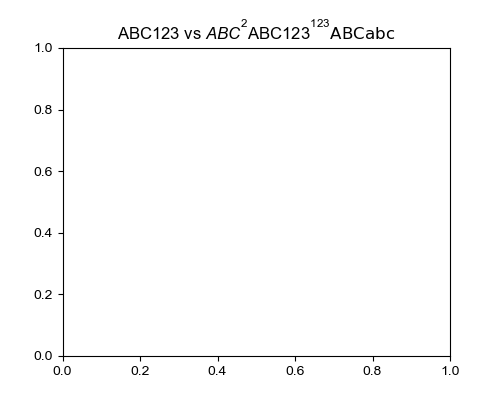

In [6]:
import matplotlib
'''To make the tex-style/mathtext text look like the regular text, 
you need to set the mathtext font to Bitstream Vera Sans:'''

matplotlib.rcParams['mathtext.fontset'] = 'custom'
# set the font
plt.rcParams["font.family"] = 'arial' #'Bitstream Vera Sans'# 'arial' #
matplotlib.rcParams['mathtext.rm'] = 'arial' #'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'arial:italic' #'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'arial:bold' #'Bitstream Vera Sans:bold'
fig, ax = plt.subplots(figsize=(5, 4))
matplotlib.pyplot.title(r'ABC123 vs $ABC^2\mathrm{ABC123}^{123}\mathsf{ABCabc}$')

'''If you want the regular text to look like the mathtext text, 
you can change everything to Stix. This will affect labels, titles, ticks, etc.'''

# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'arial' #'STIXGeneral'
# matplotlib.pyplot.text(0.,0.5,r'ABC123 vs $\mathrm{ABC123}^{123}\mathsf{ABCabc}$')

#plt.style.use(u'classic')#u'seaborn-paper') # Set back to default

In [ ]:
(491+375+375)/3.*0.0001*8*3.1415**2

## Draggable text

In [ ]:
from matplotlib.text import Text
class DragTextHandler(object):
    """ A simple class to handle Drag n Drop.
    This is a simple example, which works for Text objects only.
    """
    def __init__(self, figure=None) :
        """ Create a new drag handler and connect it to the figure's event system.
        If the figure handler is not given, the current figure is used instead
        """

        if figure is None : figure = plt.gcf()
        # simple attibute to store the dragged text object
        self.dragged = None

        # Connect events and callbacks
        figure.canvas.mpl_connect("pick_event", self.on_pick_event)
        #figure.canvas.mpl_connect("motion_notify_event", self.on_move_event)
        figure.canvas.mpl_connect("button_release_event", self.on_release_event)

    def on_pick_event(self, event):
        " Store which text object was picked and were the pick event occurs."
        if isinstance(event.artist, Text):
            self.dragged = event.artist
            self.pick_pos = (event.mouseevent.xdata, event.mouseevent.ydata)
        return True
#     def on_move_event(self, event):# by Xu not working well (sticky to the mouse)
#         " Update text position and redraw"
#         if self.dragged is not None :
#             old_pos = self.dragged.get_position()
#             new_pos = (old_pos[0] + event.xdata - self.pick_pos[0],
#                        old_pos[1] + event.ydata - self.pick_pos[1])
#             self.dragged.set_position(new_pos)
#             #self.dragged = None
#             plt.draw()
#         return True
    def on_release_event(self, event):
        " Update text position and redraw"
        if self.dragged is not None :
            old_pos = self.dragged.get_position()
            new_pos = (old_pos[0] + event.xdata - self.pick_pos[0],
                       old_pos[1] + event.ydata - self.pick_pos[1])
            self.dragged.set_position(new_pos)
            self.dragged = None
            plt.draw()
        return True
# set picker=True when drawing the Text
# dragh = DragTextHandler()

class DraggableText(object): 
    """ A simple class to handle Drag n Drop.
    This is a simple example, which works for Text objects only.
    """
    def __init__(self, figure=None):
        """ Create a new drag handler and connect it to the figure's event system.
        If the figure handler is not given, the current figure is used instead
        """
        if figure is None:
            figure = plt.gcf()          
        # simple attibute to store the dragged text object
        self.dragged = None # store the text to drag
        self.press = None # store the old text position and the press event position
        # the location of the text location in axes coords to show the position of the dragged text
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

        # Connect events and callbacks
        figure.canvas.mpl_connect("pick_event", self.on_pick_event)
        figure.canvas.mpl_connect("motion_notify_event", self.on_motion_event)
        figure.canvas.mpl_connect("button_release_event", self.on_release_event)
     
    def on_pick_event(self, event):
        " Store which text object was picked and were the pick event occurs."
        if isinstance(event.artist, Text):
            self.dragged = event.artist
            x0, y0 = event.artist.get_position()
            self.press = x0, y0, event.mouseevent.xdata, event.mouseevent.ydata # have to insert '.mouseevent'

    def on_motion_event(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        x0, y0, xpress0, ypress0 = self.press
        new_position = (x0+event.xdata - xpress0, y0+event.ydata - ypress0)
        self.dragged.set_position(new_position)
        self.txt.set_text('x=%1.2f, y=%1.2f' % new_position)
        plt.draw()

    def on_release_event(self, event):
        'on release we reset the press data'
        self.press = None
        self.txt.set_text('')
        plt.draw()
        return
# set picker=True when drawing the Text
# dragh = DragTextHandler()

# Cp data of Nd2Zr2O7, Nd2Sn2O7, La2Zr2O7
##Nd2Sn2O7
1. HZB data /2: become per mole Nd2
2. Blote data: per mole Nd2

##La2Sn2O7
1. Strange: above 10K, higher than Nd2Sn2O7

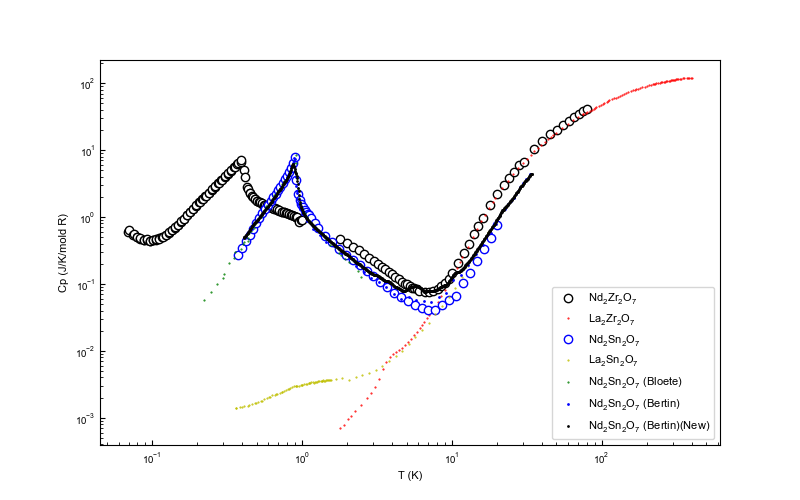

In [131]:
# ｌｏａｄ　ｄａｔａ
#fpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
fpath0 = r'E:\Backup_HZB_pc\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'

fname0 = r'cp_ndzro_lowT_with_ppms.txt'
fname1 = r'cp_lazro_2-400k.txt'
fname2 = r'Nd2Sn2O7_digitized_1969Blote.txt' # T, Cp/R(JK/mol Nd)
#fname = r'cp_ndzro_lowT_with_ppms_subLa.txt'
fname3 = r'D:\4_Physical_Properties\Nd2Sn2O7/Cp_Nd2Sn2O7.txt' # A. Bertin
fname4 = r'D:\4_Physical_Properties\Nd2Sn2O7/Cp_Nd2Sn2O7_Digitize_Bertlin_HighT.txt'

# Load data
# cpnd = np.genfromtxt(os.path.join(fpath0, fname0), usecols=(0,1), skip_header=1) # Nd2Zr2O7 from Augusberg
# cpla = np.genfromtxt(os.path.join(fpath0, fname1), usecols=(0,1), skip_header=1) # La2Zr2O7
# cpndsn_Blote = np.genfromtxt(os.path.join(fpath0, fname2), usecols=(0,1), skip_header=1) # Nd2Sn2O7 from Blote 
# cpndsn_Blote[:,1] = 8.315*cpndsn_Blote[:,1] # convert to Cp/mol Nd for BLoete

cpndsn = np.genfromtxt(fname3, delimiter=',') # Nd2Sn2O7 from A. Bertin
cpndsn_highT = np.genfromtxt(fname4, delimiter=',')

# Cp data by Ralf at HZB 2023
fpath1 = r'D:\4_Physical_Properties\Nd2Sn2O7/'
cpndsn_hzb = np.genfromtxt(os.path.join(fpath1, 'Nd2Sn2O7_Cp_HZB.txt'), usecols=(0,2), skip_header=1) # Nd2Zr2O7
cplasn_hzb = np.genfromtxt(os.path.join(fpath1, 'La2Sn2O7_Cp_HZB.txt'), usecols=(0,2), skip_header=1) # La2Zr2O7

#%matplotlib inline
fig=plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xscale='log', yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
ax.plot(cpnd[:,0], cpnd[:,1]/2,'o', mfc='white',mec='black',label=r'Nd$_2$Zr$_2$O$_7$')
ax.plot(cpla[:,0], cpla[:,1]/2,'r.',markersize=1,label=r'La$_2$Zr$_2$O$_7$')

ax.plot(cpndsn_hzb[:,0], cpndsn_hzb[:,1]/4,'o', mfc='white',mec='b',label=r'Nd$_2$Sn$_2$O$_7$')
ax.plot(cplasn_hzb[:,0], cplasn_hzb[:,1]/4,'y.',markersize=1,label=r'La$_2$Sn$_2$O$_7$')

# Nd2Sn2O7 from Bloete, Bertin and Bertin_2nd
ax.plot(cpndsn_Blote[:,0], cpndsn_Blote[:,1]/2,'g.',markersize=1,label=r'Nd$_2$Sn$_2$O$_7$ (Bloete)')
ax.plot(cpndsn[:,0], cpndsn[:,1]/2,'o',markersize=1,mfc='white',mec='blue',label=r'Nd$_2$Sn$_2$O$_7$ (Bertin)')
ax.plot(cpndsn_highT[:,0], cpndsn_highT[:,1]/2, 'o', markersize=1,mfc='white',mec='black',label=r'Nd$_2$Sn$_2$O$_7$ (Bertin)(New)')

ax.set_xlabel('T (K)')
ax.set_ylabel('Cp (J/K/mold R)')
plt.legend()
plt.show()

# Export data for Owen
#np.savetxt(os.path.join(fpath, 'Nd2Zr2O7_Cp_2-100K.txt'),np.vstack([cpnd[:,0],cpnd[:,1]/2]).T)
#np.savetxt(os.path.join(fpath, 'La2Zr2O7_Cp_2-300K.txt'),np.vstack([cpla[:,0],cpla[:,1]/2]).T)

In [ ]:
plt.close('all')

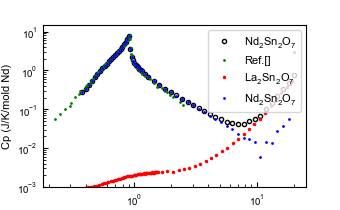

In [125]:
fpath1 = r'D:\4_Physical_Properties\Nd2Sn2O7/'
cpndsn_hzb = np.genfromtxt(os.path.join(fpath1, 'Nd2Sn2O7_Cp_HZB.txt'), usecols=(0,2), skip_header=1) # Nd2Zr2O7
cplasn_hzb = np.genfromtxt(os.path.join(fpath1, 'La2Sn2O7_Cp_HZB.txt'), usecols=(0,2), skip_header=1) # La2Zr2O7

latexify()
fig=plt.figure()
ax = fig.add_subplot(111, xscale='log', yscale='log')
ax.plot(cpndsn_hzb[:,0], cpndsn_hzb[:,1]/4,'o',ms=3,mfc='white',mec='black',label=r'Nd$_2$Sn$_2$O$_7$')
ax.plot(cpndsn_Blote[:,0], cpndsn_Blote[:,1]/2,'g.',markersize=2,label=r'Ref.[]')

scale_La = 0.65
ax.plot(cplasn_hzb[:,0], scale_La*cplasn_hzb[:,1]/4,'r.',markersize=3,label=r'La$_2$Sn$_2$O$_7$') # 05*: LaSn data seems seems two times larger

cpndsn_hzb_sub = cpndsn_hzb.copy()
cplasn_hzb_interp= interp1d(cplasn_hzb[:,0], cplasn_hzb[:,1])
mask = (0.3<cpndsn_hzb_sub[:,0]) & (cpndsn_hzb_sub[:,0]<19.5)
cpndsn_hzb_sub[mask,1] = cpndsn_hzb[mask,1]/4 - scale_La*cplasn_hzb_interp(cpndsn_hzb_sub[mask,0])/4 #0.5*

ax.plot(cpndsn_hzb_sub[:,0], cpndsn_hzb_sub[:,1],'o', ms=1,mfc='white',mec='b',label=r'Nd$_2$Sn$_2$O$_7$')

ax.set_ylim([0.001,15])
ax.set_xlabel('T (K)')
ax.set_ylabel('Cp (J/K/mold Nd)')
plt.legend()
plt.show()
#fig.savefig(os.path.join(fpath, r'Nd_La_Cp.pdf'), bbox_inches="tight") 

## Cp of crystal Nd2Zr2O7 in zero field (fit nuclear, magnon, phonon)

## Define functions

In [31]:
#　Ｄｅｆｉｎｅ　ｆｕｎｓ　ｆｏｒ　Ｃｐ　ｏｆ　ｎｕｃｌｅａｒ　１／Ｔ２，　ｍａｇｎｏｎ　Ｔ３　ａｎｄ　ｐｈｏｎｏｎ　Ｔ３

R = 8.314 #in J/K/mol
kb = 0.08617 # in meV/K

def cpNuclear(t, n):
    return R*n/t**2

def cpMag(t, a,b):
    return R*a*t**b    

def cpnm(t,n,a,b):# nuclear + mag
    return R*n/t**2 + R*a*t**b 

def cpph(t,n): # phonon
    return R*n*t**3

def cpph0(t,n0,n1): # phonon
    return n0*t**3 + n1*t**5
# def cpph1(t,n,m):
#     return R*n*t**m

def cpph1(t,*args):
    #print len(args), args
    if len(args)==1:
        return R*args[0][0]*t**args[0][1]
    else:
        return R*args[0]*t**args[1]

def cpNuclear1(t, n, m):
    return R*n/t**m

def cpnm1(t,n,m,a,b):
    return R*n / t**m + R*a * t**b 

def cp_ht_ph(t, a, n0, n1):
    """
    Fit magnetic hight temperature expansion aT^-2 and low T phonon c T^3 + d T^5
    """
    return a* t**-2 + n0*t**3 + n1*t**5

def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

#print fitReg(cpnd,0.0,0.2)

# Test fit
popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,[0.0,0.8])[:,0], fitReg(cpnd,0.0,0.8)[:,1], [0.00065,50,3])
print(popt)

[ 1.0969232  1.373021   1.7390976  2.1890461  2.6881283  3.2430396
  3.8573927  4.5251047  5.2301437  6.0257027  6.9271851  7.899738
  8.9659689 10.118198  11.419535  12.901429  14.573717  16.494512 ]
[-1.42052624e-03  4.31587295e+00  3.45418491e+00]


## Fit nuclear $T^{-2}$ and magnon $T^3$

In [34]:
# Ａｊｕｓｔ　ｔｈｅ　ｆｉｔｔｉｎｇ　ｒｅｇｉｏｎ
#　ｆｉｔ　３　ｐａｒａｍｅｔｅｒｓ　ｎ，　ａ，ｂ
#%matplotlib inline
fig_label = ('Data', r'Nuclear$\sim T^{-2}$', r'Magnon$\sim T^{3}$', 'Nuclear+magnon')
print(fig_label)

def pltFitReg(x1,x2=0.18):
    popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,50,3])
    print(popt)    
    
    global fig, ax
    ax.cla()
    #ax.grid(color='w', linewidth=2, linestyle='solid')
    
    ax.plot(cpnd[:,0], cpnd[:,1], 'o', mfc='white',label=fig_label[0])
    # Strange: ‘label=...’ must put after 'o'? 
    # after keyword='o', it works

    t = np.linspace(0.01, 1, 100)
    ax.plot(t, cpNuclear(t, popt[0]), 'b--', lw=0.5, alpha=1, label=fig_label[1])
    ax.plot(t, cpMag(t, popt[1], popt[2]),  'b--', lw=0.5, alpha=1, label=fig_label[2])
    #ax.plot(t, cpMag(t, 7.45, 2.32),color='orange',linestyle='--', lw=0.5, alpha=1)   
    ax.plot(t, cpnm(t,popt[0],popt[1],popt[2]), 'r', lw=1, alpha=1, label=fig_label[3])
        
    ax.set_xlim(0.05, 1)
    ax.set_ylim(0.1, 15)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol Nd)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)
    
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)

#   ax.xaxis.set_ticks_position('bottom')
#   ax.yaxis.set_ticks_position('left')

    handles, labels = ax.get_legend_handles_labels()
    #ax.legend([handles[0],handles[3]], [labels[0],labels[3]],loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False)
    ax.legend([handles[0],handles[3],handles[1],handles[2]], [labels[0],labels[3],labels[1],labels[2]],loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False)
    #ax.legend(loc='best',numpoints=1,fontsize=13, frameon=False)

    ax.axvspan(0.07, 0.175, alpha=0.5, color='lightgrey')    
    ax.text(0.11, 1.2,r'Fitted'+'\n'+'region',size=14, ha='center', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    #ax.text(0.45, 9,r'$\sim T^{2.34}$',size=14,color='orange', ha='left', va='center',
             #backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.text(0.072,7,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal',size=14, ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT1.pdf'), bbox_inches="tight", verbose=True) 

    return fig

#interact(pltFitReg, x1=(0,0.2,0.01), x2=(0.1,0.4,0.005),__manual=True)
#interact(pltFitReg, x1=(0,0.2,0.01), x2=(0.1,0.4,0.005),continuous_update=False)

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
interact(pltFitReg, x1=widgets.FloatSlider(min=0.,max=0.2,step=0.005,value=0.0),
         x2=widgets.FloatSlider(min=0.1,max=0.4,step=0.005,value=0.18),__manual=True) 


('Data', 'Nuclear$\\sim T^{-2}$', 'Magnon$\\sim T^{3}$', 'Nuclear+magnon')


interactive(children=(FloatSlider(value=0.0, description='x1', max=0.2, step=0.005), FloatSlider(value=0.18, d…

<function __main__.pltFitReg(x1, x2=0.18)>

## Entropy: subtract nuclear $T^{-2}$, magnon $T^{3}$ and phonon $T^{3}$

In [35]:
# Ａｊｕｓｔ　ｔｈｅ　ｆｉｔｔｉｎｇ　ｒｅｇｉｏｎ ｎｕｃｌｅａｒ＋ｍａｇ＋ｐｈｏｎｏｎ
#　ｆｉｔ　４　ｐａｒａｍｅｔｅｒｓ：　ｎ　（ｎｕｃｌｅａｒ），　ａ，　ｂ　（ｍａｇｎｏｎ）　ａｎｄ　　ｎ　（ｐｈｏｎｏｎ）　
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

fig_label = ('Data', r'Nuclear$\sim T^{-2}$', r'Magnon$\sim T^{3}$', 'Nuclear+magnon', 'Phonon')
print(fig_label)

def pltFitReg(x1=10,x2=18, x3=0,x4=0.18):
    global fig, ax
    plt.cla()  
    ax.plot(cpnd[:,0], cpnd[:,1], 'o', mfc='white',label=fig_label[0])
    ax.plot(cpla[:,0], cpla[:,1],'b.', markersize=3)
#   Fit phonon with n*T**m    
#     popt0, pcov = optimize.curve_fit(lambda t, n,m: cpph1(t,n,m), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,3])
#     print popt0    
#     t = np.linspace(5, 18, 100)
#     ax.plot(t, cpph1(t, popt0), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit phonon with n0*T**3+n1*T**5 Note: the unit is per mole Nd
    popt0, pcov = optimize.curve_fit(lambda t, n0,n1: cpph0(t,n0,n1), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00015,0.0000012])
    print(popt0)    
    t = np.linspace(5, 18, 100)
    ax.plot(t, cpph0(t, popt0[0], popt0[1]), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit mag+nuclear with aT**-2 + bT**3        
    popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,x3,x4)[:,0], fitReg(cpnd,x3,x4)[:,1], [0.00065,50,3])
    print(popt)
    
    t = np.linspace(0.01, 1, 100)
    ax.plot(t, cpNuclear(t, popt[0]), 'b--', lw=0.5, alpha=1, label=fig_label[1])
    ax.plot(t, cpMag(t, popt[1], popt[2]),  'b--', lw=0.5, alpha=1, label=fig_label[2])
    #ax.plot(t, cpMag(t, 7.45, 2.32),color='orange',linestyle='--', lw=0.5, alpha=1)  
    ax.plot(t, cpnm(t,popt[0],popt[1],popt[2]), 'r', lw=1, alpha=1, label=fig_label[3])

    
    ax.set_xlim(0.06, 30)
    ax.set_ylim(0.02, 30)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'Cp (J/K/mol Nd)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend([handles[0],handles[4],handles[1]],
              [labels[0],labels[4],labels[1]],loc='best',numpoints=1,frameon=False,framealpha=1,
              fontsize=12,fancybox=True,shadow=False)
 
    ax.axvspan(0.07, 0.175, alpha=0.5, color='lightgrey')    
    ax.text(0.11, 1.4,r'Fitted'+'\n'+'region',size=13, ha='center', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    #ax.text(0.45, 9,r'$\sim T^{2.34}$',size=13,color='orange', ha='left', va='center',
             #backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.text(0.4,0.2,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal',size=13, ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.text(3,1,r'Entropy'+'\n'+'~ 0.95R ln2',size=13, ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT.pdf'), bbox_inches="tight", verbose=True) 
    
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=8.,max=18,step=0.5,value=10),
         x2=widgets.FloatSlider(min=11,max=20,step=0.5,value=16),
        x3=widgets.FloatSlider(min=0.,max=0.2,step=0.005,value=0.0),
         x4=widgets.FloatSlider(min=0.1,max=0.4,step=0.005,value=0.18))#,__manual=True) 


('Data', 'Nuclear$\\sim T^{-2}$', 'Magnon$\\sim T^{3}$', 'Nuclear+magnon', 'Phonon')


interactive(children=(FloatSlider(value=10.0, description='x1', max=18.0, min=8.0, step=0.5), FloatSlider(valu…

<function __main__.pltFitReg(x1=10, x2=18, x3=0, x4=0.18)>

In [ ]:
480+850+68+20+250+280+50

## Fit reported

In [37]:
# Ａｊｕｓｔ　ｔｈｅ　ｆｉｔｔｉｎｇ　ｒｅｇｉｏｎ ｎｕｃｌｅａｒ＋ｍａｇ＋ｐｈｏｎｏｎ
#　ｆｉｔ　４　ｐａｒａｍｅｔｅｒｓ：　ｎ　（ｎｕｃｌｅａｒ），　ａ，　ｂ　（ｍａｇｎｏｎ）　ａｎｄ　　ｎ　（ｐｈｏｎｏｎ）　
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
latexify()
fig_label = (r'Nd$_2$Zr$_2$O$_7$', r'Nuclear$\sim T^{-2}$', r'Magnon$\sim T^{3}$', 'Nuclear+magnon', 'Phonon',r'La$_2$Zr$_2$O$_7$')
print(fig_label)

cp_rep = np.genfromtxt(r'D:\3_Physical Properties\Heat_Capacity\Cp_ndzro_reported.txt')
def pltFitReg(x1=10,x2=18, x3=0,x4=0.18):
    global fig, ax
    plt.cla()  
    ax.plot(cpnd[:,0], cpnd[:,1], 'o',mec='r', mfc='white',markersize=1,label=fig_label[0])# plot raw data: Nd
    ax.plot(cpla[:,0], cpla[:,1],'s',mec='black',mfc='white',markersize=1,label=fig_label[5],zorder=0)# plot raw data: La
    ax.plot(cp_rep[:,0],cp_rep[:,1], '^',mec='blue',mfc='white',markersize=1,label='Ref. [18]',zorder=0)
#   Fit phonon with n*T**m    
#     popt0, pcov = optimize.curve_fit(lambda t, n,m: cpph1(t,n,m), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,3])
#     print popt0    
#     t = np.linspace(5, 18, 100)
#     ax.plot(t, cpph1(t, popt0), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit phonon with n0*T**3+n1*T**5 Note: the unit is per mole Nd2 or La2
#     popt0, pcov = optimize.curve_fit(lambda t, n0,n1: cpph0(t,n0,n1), fitReg(cpla,x1,x2)[:,0], fitReg(cpla,x1,x2)[:,1], [0.00015,0.0000012])
#     print popt0    
#     t = np.linspace(0, x2, 100)
#     ax.plot(t, cpph0(t, popt0[0], popt0[1]), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit mag+nuclear with aT**-2 exp(-d/kbT) 
#     popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,x3,x4)[:,0], fitReg(cpnd,x3,x4)[:,1], [0.00065,50,3])
#     print popt
    
    t = np.linspace(0.01, 0.2, 100)
    ax.plot(t, 0.0062 * t**-2, 'r--', dashes=(1, 1), lw=0.5, alpha=1, label=fig_label[1]) # use fited A in A T^-2 + T^2 Exp-d/T
#     ax.plot(t, cpMag(t, popt[1], popt[2]),  'b--', lw=0.5, alpha=1, label=fig_label[2])
#     #ax.plot(t, cpMag(t, 7.45, 2.32),color='orange',linestyle='--', lw=0.5, alpha=1)  
#     ax.plot(t, cpnm(t,popt[0],popt[1],popt[2]), 'r', lw=1, alpha=1, label=fig_label[3])
        
    ax.set_xlim(0.06, 80)
    ax.set_ylim(0.015, 100)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'$C_\mathrm{p}$ (J/K/mol)',labelpad=-1)  
    ax.set_xlabel(r'T (K)',labelpad=-1)  
    ax.tick_params(axis='both',which='both',direction='in')
    
    #ax.legend(loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False).draggable()
    ax.legend(loc=[-0.05,0.78],ncol=2,numpoints=1,frameon=False,framealpha=1,fancybox=True,
              shadow=False,handletextpad=0,columnspacing=0.,labelspacing=0).draggable()
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend([handles[0],handles[4],handles[1]],
#               [labels[0],labels[4],labels[1]],loc='best',numpoints=1,frameon=False,framealpha=1,
#               fontsize=12,fancybox=True,shadow=False)
 
#     ax.axvspan(0.07, 0.175, alpha=0.5, color='lightgrey')    
#     ax.text(0.11, 4,r'Fitted'+'\n'+'region',size=13, ha='center', va='center',
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    #ax.text(0.45, 9,r'$\sim T^{2.34}$',size=13,color='orange', ha='left', va='center',
             #backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
#     ax.text(0.4,0.2,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal',size=13, ha='left', va='center',
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    ax.text(0.13,0.06,r'Entropy'+'\n'+r'~ $0.93\,\times2\,R\,\ln(2)$', ha='left', va='center',picker=True,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    #dragh = DragTextHandler()#set picker=True when drawing the Text
    #dragh = DraggableText(fig)
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT0_new.pdf'), bbox_inches="tight", verbose=True) 
    
    return

fig, ax = plt.subplots(figsize=(3,2.4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=5.,max=18,step=0.5,value=10),
         x2=widgets.FloatSlider(min=11,max=50,step=0.5,value=20),
         x3=widgets.FloatSlider(min=0.,max=0.2,step=0.005,value=0.0),
         x4=widgets.FloatSlider(min=0.1,max=0.4,step=0.005,value=0.18))#,__manual=True) 

dragh = DraggableText()# must put here not in the function!!


('Nd$_2$Zr$_2$O$_7$', 'Nuclear$\\sim T^{-2}$', 'Magnon$\\sim T^{3}$', 'Nuclear+magnon', 'Phonon', 'La$_2$Zr$_2$O$_7$')


FileNotFoundError: D:\3_Physical Properties\Heat_Capacity\Cp_ndzro_reported.txt not found.

In [ ]:
# after drag the legend and text, save it
#fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT000.pdf'), bbox_inches="tight", pad_inches=0.01,verbose=True) 

## Fit excitation gaps

### Nd2Zr2O7

interactive(children=(FloatSlider(value=0.0, description='x1', max=0.1, step=0.01), FloatSlider(value=0.18, de…

<function __main__.pltFitReg(x1=0, x2=0.3)>

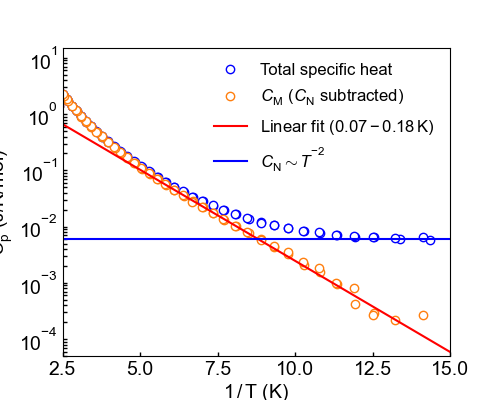

In [40]:
# Ｆｉｔ　ｗｉｔｈ　ａ　ｇａｐｐｅｄ　ｅｘｃｉｔａｔｉｏｎｓ　Ｔ＾－２　Ｅｘｐ（－ｄｅｌｔａ／Ｔ）

def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + a/t**2 * np.exp(-b/t)

# Plot to check the starting parameters
ndT, ndCp = fitReg(cpnd,0,0.5)[:,0], fitReg(cpnd,0,0.5)[:,1]
invT, logCp = 1/ndT, ndCp * ndT**2

cpNd = np.vstack([invT, logCp]).T

# t = np.linspace(0.01, 0.4, 100)
# cpfit = cpnmGap(t,0.001,5,1.1)

# x, y = 1/t, np.log2(cpfit * t**2)

# fig, ax = plt.subplots(figsize=(5, 4))

# plt.plot(cpNd[:,0],cpNd[:,1])
# plt.plot(x,y)

# plt.show()

def pltFitReg(x1=0,x2=0.3):    
    global fig, ax
    plt.cla()  
    
    popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.008,4,0.7])
    print(popt,popt[-1]/11.6, 'meV gap')

    # plot the raw data
    ax.plot(cpNd[:,0], cpNd[:,1], 'o', mec='b', mfc='white',label='Total specific heat') 
    # plot the subtracted data
    cpNuclear = popt[0] /  cpnd[:,0]**2
    cpSub = cpnd[:,1] - cpNuclear
    ax.plot(1/cpnd[:,0], cpSub * cpnd[:,0]**2, 'o', mfc='white',label=r'$C\mathrm{_M}$ ($C\mathrm{_N}$ subtracted)') 
    
    # plot the fit (only the mag) and the nuclear
    t = np.linspace(0.01, 0.6, 100)
    cpMag = popt[1]/t**2 * np.exp(-popt[2]/t)    
    ax.plot(1/t, cpMag * t**2, 'r-', label=r'Linear fit ($0.07-{:1.2f}\,$K)'.format(x2) ) 
    ax.plot(1/t, popt[0]/t**2 * t**2, 'b-', label=r'$C_\mathrm{N}\sim T^{-2}$')
    
#     cpfit = cpnmGap(t,popt[0],popt[1],popt[2])
#     x, y = 1/t, np.log2(cpfit * t**2)
#     ax.plot(x, y, 'b--', lw=0.5, alpha=1)
    
    ax.set_xlim(2.5, 15) # 1/T limit
    ax.set_ylim(0.00005, 15)   
    ax.set_yscale('log')
    
    ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol)',size=14,labelpad=2)  
    ax.set_xlabel(r'$1\,/\,$T (K)',size=14,labelpad=2)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
    plt.legend(loc='best',numpoints=1,fontsize=12, frameon=False,framealpha=1)
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT1.pdf'), bbox_inches="tight", verbose=True) 
    
    return #fig
    
fig, ax = plt.subplots(figsize=(5, 4))

interact(pltFitReg, 
         x1=widgets.FloatSlider(min=0,max=0.1,step=0.01,value=0.0),
         x2=widgets.FloatSlider(min=0.1,max=0.4,step=0.01,value=0.18))#,__manual=True) 

In [39]:
plt.close('all')

### Nd2Sn2O7
1. Only fit data of Blote below 0.45K, can we get gap~0.185meV
2. The data of Blote has more low temperature points
3. Fit HZB data, gap>0.25meV

In [189]:
# Ｎｄ２Ｓｎ２Ｏ７　ｔｒｙ：　Ｆｉｔ　ｗｉｔｈ　ａ　ｇａｐｐｅｄ　ｅｘｃｉｔａｔｉｏｎｓ　Ｔ＾－２　Ｅｘｐ（－ｄｅｌｔａ／Ｔ）
# Nd2Sn2O7
def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + a/t**2 * np.exp(-b/t)

fpath = r'D:\7_Writing\1_Paper Draft\11_Nd2Sn2O7'
# Plot to check the starting parameters
ndT, ndCp = fitReg(cpndsn_Blote,0,1)[:,0], fitReg(cpndsn_Blote,0,1)[:,1]
#ndT, ndCp = fitReg(cpndsn_hzb,0,1)[:,0], fitReg(cpndsn_hzb,0,1)[:,1]
invT, logCp = 1/ndT, ndCp * ndT**2
cpnd_inv = np.vstack([invT, logCp]).T

cpnd = cpndsn_Blote
def pltFitReg(x1=0,x2=0.8):    
    global fig, ax
    plt.cla()  
    popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.008,4,2.0])
    print(popt, pcov, '\n', 'The gap is: {:1.4f}+/-{:1.4f} meV'.format(popt[2]/11.6, pcov[2,2]/11.6) )

    # plot the raw data
    ax.plot(cpnd_inv[:,0], cpnd_inv[:,1], 'o', mec='b', mfc='white',label='Data (Ref.[])') 
    # plot the subtracted data
    cpNuclear = popt[0] /  cpnd[:,0]**2
    cpSub = cpnd[:,1] - cpNuclear
    ax.plot(1/cpnd[:,0], cpSub * cpnd[:,0]**2, 'o', mfc='white',label=r'$\mathrm{Data}-C_\mathrm{N}$') 
    
    # plot the fit (only the mag) and the nuclear
    t = np.linspace(x1, x2, 200)
    cpMag = popt[1]/t**2 * np.exp(-popt[2]/t)    
    ax.plot(1/t, cpMag * t**2, 'r-', label=r'Linear fit (below %.2f K)'%x2 ) 
    ax.plot(1/t, popt[0]/t**2 * t**2, 'b-', label=r'$C_\mathrm{N}\sim T^{-2}$')
    #ax.text(0.5,0.1,r'Nd$_2$Sn$_2$O$_7$',fontsize=14)
    
    ax.set_xlim(0.1, 5) # 1/T limit
    ax.set_ylim(0.001, 50)   
    ax.set_yscale('log')
    
    ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol)',labelpad=2)  
    ax.set_xlabel(r'$1\,/\,$T (K)',labelpad=2)  
    ax.tick_params(axis='both',which='both',width=1,length=3)
    
    plt.legend(loc='best',numpoints=1, frameon=False,framealpha=1)
    print(fpath)
    fig.savefig(os.path.join(fpath, r'Cp_fit_gap.pdf'), bbox_inches="tight", pad_inches=0.01) 
    
    return fig
    
fig, ax = plt.subplots()
interact(pltFitReg, 
         x1=widgets.FloatSlider(min=0.1,max=0.5,step=0.01,value=0.1),
         x2=widgets.FloatSlider(min=0.4,max=1.0,step=0.01,value=0.45))#,__manual=True) 

interactive(children=(FloatSlider(value=0.1, description='x1', max=0.5, min=0.1, step=0.01), FloatSlider(value…

<function __main__.pltFitReg(x1=0, x2=0.8)>

## Entropy

### Entropy (old): subtract fitted phonon and nuclear

In [10]:
# Ｃａｌｃｕｌａｔｅ　ｅｎｔｒｏｐｙ：　ｔｗｏ　ｍｅｔｈｏｄｓ
##############################
# 1st method: use interplatation (not good) take long time

# subtract nuclear and magnon contributions
# take care of 'R*' in the defined functions
cpsub = cpnd[:,1] - cpNuclear(cpnd[:,0], 3.19721123e-04) - cpph1(cpnd[:,0], 1.22717554e-06, 4.12695321e+00)
cpt = np.array(cpsub) / cpnd[:,0]

# interplatation functions
cpinter= interp1d(cpnd[:,0],cpsub)
cptinter= interp1d(cpnd[:,0],cpt)

# plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(cpnd[:,0],cpsub)

x = np.linspace(0.072,18,500)
#ax.plot(x,np.interp(x, cpnd[:,0],cpsub))
ax.plot(x,cpinter(x))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# calculate entropy
def entropy(t):
    return quad(cptinter,0.072,t)[0]/R/np.log2(2)
print(entropy(18))
# fig, ax = plt.subplots(figsize=(5, 4))
# ax.plot(x,[entropy(x) for  x in x]) #take long time
# fig.show()

##############################
#2nd method
cpsub = cpnd[:,1] - cpNuclear(cpnd[:,0], 3.19721123e-04) - cpph1(cpnd[:,0], 1.22717554e-06, 4.12695321e+00)

cpt = np.array(cpsub) / cpnd[:,0]
entropy = cumtrapz(cpt,cpnd[:,0], initial=0)/R/np.log(2)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(cpnd[:,0],entropy,'-')
ax.set_xlim(0,10)
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1.3473731530833808


<ipython-input-10-55fade970b82>:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(cptinter,0.072,t)[0]/R/np.log2(2)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Entropy（new）: subtract La phonon and nuclear (fitted gapped magons)

In [11]:
from scipy.integrate import quad, cumtrapz
from scipy.interpolate import interp1d

# Subtract nuclear and La phonon
cpNu = 0.00613702 /  cpnd[:,0]**2
cpLaInter = interp1d(cpla[:,0], cpla[:,1])

cpsub = cpnd[:,1] - cpNu

mask = np.array( np.where( (cpnd[:,0]>cpla[:,0].min()) & (cpnd[:,0]<30) ) ).ravel()
cpsub[mask] = cpsub[mask] - cpLaInter(cpnd[mask,0])

cpt = np.array(cpsub) / cpnd[:,0]
entropy = cumtrapz(cpt,cpnd[:,0], initial=0.1)/2/R/np.log(2)
print(entropy[cpnd[:,0]<=10].max())

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(cpnd[:,0],entropy,'-')
ax.set_xlim(0,90)
ax.set_ylim(0,4)
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
fig.show()

0.9110069445025768


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
# ｆｉｔ　４　ｐａｒａｍｅｔｅｒｓ，　ｎ，ｍ　（ｎｕｃｌｅａｒ），　ａ，ｂ　（ｍａｇｉｏｎ）；　ｆｉｔ　ｔｈｅ　ｅｘｐｏｎｅｎｔ　ｆｏｒ　ｎｕｃｌｅａｒ　Ｃｐ　ａｌｓｏ

def pltFitReg(x1,x2):
    popt, pcov = optimize.curve_fit(lambda t, n,m, a, b: cpnm1(t, n,m,a,b), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,2, 50, 3])
    #popt, pcov = optimize.curve_fit(cpnm1, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065, 2, 50, 3])
    print(popt)
    
    global fig, ax
    plt.cla()
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.plot(cpnd[:,0], cpnd[:,1] , 'o', mfc='none')

    t = np.linspace(0.01, 1, 100)

    ax.plot(t, cpNuclear1(t, popt[0],popt[1]), 'b--', lw=0.5, alpha=1)
    ax.plot(t, cpMag(t, popt[2], popt[3]), 'b--', lw=0.5, alpha=1)
    ax.plot(t, cpnm1(t,popt[0],popt[1],popt[2],popt[3]), color='r', lw=1, alpha=1)
       
    ax.set_xlim(0.05, 1)
    ax.set_ylim(0.1, 15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #fig.show()
    return #fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
interact(pltFitReg, x1=(0,0.2,0.01), x2=(0.1,0.4,0.005),continuous_update=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.1, description='x1', max=0.2, step=0.01), FloatSlider(value=0.25, de…

<function __main__.pltFitReg(x1, x2)>

## Cp of Nd2Zr2O7 with field along [111]
1. Plot all; 
2. load and strore all data
3. Maually subtraction for each data and fitting data with gapped magon+neclear

In [ ]:
#　Ｃｐ　ｉｎ　ｆｉｅｌｄｓ　０，　０．２，　０．５，　２Ｔ
import numpy as np
import fnmatch
import os

fpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
fname = r'C vs T_Nd2Zr2O7_*.txt'
#sns.set()
#sns.reset_orig()
fig, ax = plt.subplots(figsize=(2, 3))
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#ax.set_color_cycle(sns.color_palette('husl',5))
#sns.set_style("white")

ax.set_xscale('log')
ax.set_yscale('log')
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)      
        #with plt.style.context(u'seaborn-dark-palette'):
        ax.plot(temp[:,0],temp[:,1],'o', mfc=None, ms='4')
x = np.linspace(0.01,0.5,20)        
ax.plot(x,cpNuclear(x,6.1e-04),color='black')                
ax.set_xlim(0.05, 1.5)
ax.set_ylim(0.2, 18)      
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'
plt.show()

In [ ]:
# 　Ｔｅｓｔ：　ｌｏａｄ，　ｆｉｔ　ｎｕｃｌｅａｒ　Ｃｐ ａｎｄ　ｐｌｏｔ
fpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
fname = r'C vs T_Nd2Zr2O7_*.txt'

fitHlim = [0.1,0.1,0.09,0.1,0.2] # high limit the fitting region for data 0.2T, 0.5T, 0T, 1T, 2T

fig, ax = plt.subplots(figsize=(2.5, 4))
ax.set_xscale('log')
ax.set_yscale('log')

idx = 0
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)      
        
        fitLims = np.ravel([temp[:,0].min(),fitHlim[idx]])
        print('fitLimits:', fitLims)
        popt, pcov = optimize.curve_fit(cpNuclear, fitReg(temp,fitLims)[:,0],fitReg(temp,fitLims)[:,1] , [0.00065])
        print('fit:', popt)
        
        idx = idx +1
        
        dataPlot, = ax.plot(temp[:,0],temp[:,1],'o',mec=None, ms='4')
        t = np.linspace(0.05, 1, 100)
        ax.plot(t, cpNuclear(t, popt[0]), 'b--', lw=0.5, alpha=1,color=dataPlot.get_color())
        
#x = np.linspace(0.01,0.5,20)        
#ax.plot(x,cpNuclear(x,3.1e-04),color='black')        

ax.set_xlim(0.05, 1.5)
ax.set_ylim(0.2, 18)    
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'

plt.show()

In [ ]:
# Ｌｏａｄ　ａｎｄ　ｓｔｏｒｅ　ａｌｌ　ｔｈｅ　ｄａｔａ in fields 0.2T, 0.5T, 0T, 1T, 2T
# find out the number of files and their names and lengths
fnamestr = []
flengths = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname): 
        #print fname
        fnamestr.append(os.path.join(fpath,file))
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)  
        flengths.append(len(temp))
#print fnamestr, flengths 
#print max(flengths)

# store data into a array, short data is appended 'nan'
data = np.zeros((max(flengths),2*5))
data[:,:] = np.nan

idx = 0
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname): 
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)  
        temp = temp[temp[:, 0].argsort()]
        print(file, temp.shape)
        data[:flengths[idx],idx*2:idx*2+2] = temp[:,:] # Sort: the temperature not increases monotonically for 1T data
        idx = idx + 1

# Export data for owen
# print fnamestr
# idx = 0
# for i in [2,0,1,3,4]:
#     file = fnamestr[i]
#     temp = np.genfromtxt(file, usecols=(0,2), skip_header=1)  
#     temp = temp[temp[:, 0].argsort()]
#     print file, temp.shape
#     data[:len(temp),idx*2:idx*2+2] = temp[:,:] # Sort: the temperature not increases monotonically for 1T data
#     idx = idx + 1
# np.savetxt(os.path.join(fpath,'Nd2Zr2O7_Cp_0-1K_field-[111]-0_0p2_0p5_1_2T_rawdata.txt'),data)

In [ ]:
# 　Ｍａｎｕａｌｌｙ　ｓｕｂｓｔｒａｃｔ　ｎｕｃｌｅａｒ　Ｃｐ　ａｎｄ　ｐｌｏｔ
%matplotlib ipympl
datIdx= {'0.2T':0, '0.5T':1, '0T':2, '1T':3, '2T':4}
def manSub(whichD='0T', n=0.0007):
    global fig, ax, data
    plt.cla()   
    dat = data[:, datIdx[whichD]*2:datIdx[whichD]*2+2]   
    ax.plot(dat[:,0], dat[:,1], 'o', mec='none')
    cpNcal = cpNuclear(dat[:,0], n)
    ax.plot(dat[:,0], cpNcal, 'b--', lw=0.5)
    ax.plot(dat[:,0],dat[:,1]-cpNcal, 'o', mec='none')
        
    ax.set_xlim(0.01, 1.2)
    ax.set_ylim(0.05, 18)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'Cp (J/K/mol Nd)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)  
    #ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    #plt.show() # remove it otherwise two fig show
    #plt.draw() # for using extra fig window: plt.draw() and return fig.show()
    return #fig #.show()
#sns.reset_orig()
fig, ax = plt.subplots(figsize=(5, 4))
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
#RadioButtons
interact(manSub, whichD = widgets.Dropdown(description='Which data:',options=['0T', '0.2T', '0.5T','1T','2T']),
         n= widgets.FloatSlider(min=0.0001,max=0.001,step=0.00001,value=0.0008),__manual=True) 

## Fit excitation gap in fields

In [ ]:
# Ｆｉｔ　ｗｉｔｈ　ａ　ｇａｐｐｅｄ　ｅｘｃｉｔａｔｉｏｎｓ　Ｔ＾－２　Ｅｘｐ（－ｄｅｌｔａ／Ｔ）
%matplotlib ipympl

def cpmGap(t,a,b):
    return a/t**2 * np.exp(-b/t)
def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + cpmGap(t,a,b)

# Functions below cal a=R/2*(b/t)^2
# kb = 1.38*10**-23 # in J/K 
# R = 8.31; # in J/K/mol
# def cpmGap(t,a,b):# per mole Nd2, the un-used 'a' for keeping consistent with first def. above
#     return R/2. * b**2/t**2 * np.exp(-b/t)
# def cpnmGap(t,n,a,b):# nuclear + mag
#     return n / t**2 +  cpmGap(t,a,b)


datIdx= {'0.2 T':0, '0.5 T':1, '0 T':2, '1 T':3, '2 T':4}# the order in the data matrix

def WhichDataRegPlot(whichD='0T', x1=0, x2=0.3):    
    global fig, ax, fig1, ax1
    ax.cla();ax1.cla()  
    
    # By '2*' we have per mol Nd2Zr2O7!!!!!
    cpnd = np.vstack( ( data[:,datIdx[whichD]*2], 2 * data[:,datIdx[whichD]*2+1] ) ).T# Cp data of Nd at which field
    #cpnd[:,1] = 2 * cpnd[:,1] # not working: *2 every time change the data set 
    
    ndT, ndCp = fitReg(cpnd,0,0.5)[:,0], fitReg(cpnd,0,0.5)[:,1]
    invT, logCp = 1/ndT, ndCp * ndT**2
    cpNd = np.vstack([invT, logCp]).T

    popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpnd,x1,x2)[:,0],fitReg(cpnd,x1,x2)[:,1], [0.007,4,0.7])
    print('fitted par', popt,'\n', 'error', np.sqrt(np.diag(pcov)) )

    # plot the raw data
    ax.plot(cpNd[:,0], cpNd[:,1], 'o', mec='b', mfc='white',label='Total specific heat'+' (%s)'%whichD) 
    # plot the subtracted data
    cpNuclear = popt[0] /  cpnd[:,0]**2
    cpSub = cpnd[:,1] - cpNuclear
    ax.plot(1/cpnd[:,0], cpSub * cpnd[:,0]**2, 'o', mfc='white',label=r'$C\mathrm{_M}$ ($C\mathrm{_N}$ subtracted)') 
    
    # plot the fit (only the mag)
    t = np.linspace(0.01, 0.6, 100)
    cpMag = cpmGap(t,popt[1],popt[2])
    ax.plot(1/t, cpMag * t**2, 'r-', label=r'Linear fit (below %.2f K)'%x2 )#r'Linear fit (%.2f-%.2f K)'%(x1, x2) ) 
    
    #ax.axvspan(1/x1, 1/x2, alpha=0.5, color='lightgrey')    
    #ax.text(1/((x1+x2)/2), 0.05,r'Fitted'+'\n'+'region',size=13, ha='center', va='center',
    #         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.set_xlim(1, 16) # 1/T limit
    ax.set_ylim(0.000001, 15)   
    ax.set_yscale('log')
    
    ax.set_ylabel(r'$C\mathrm{_p}T^2$ (JK/mol)',size=14,labelpad=2)  
    ax.set_xlabel(r'$T^{-1}\ (\mathrm{K}^{-1})$',size=14,labelpad=2)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
    plt.legend(loc='best',numpoints=1,frameon=False,framealpha=1)
    #fig.savefig(os.path.join(fpath, 'nd_cp_crys_lowT_' + '%s'%whichD.replace(" ", "") + '.pdf'), bbox_inches="tight", verbose=True) 
    
    ax1.plot(cpnd[:,0],cpnd[:,1],'ro',label='data')
    t = np.linspace(0.05,0.4)
    #cpMag = popt[1]/t**2 * np.exp(-popt[2]/t)  
    cpMag = cpmGap(t,popt[1], popt[2])
    ax1.plot(t,cpMag,label='fit')
    ax1.plot(t,popt[0] / t**2,label='Nuclear')
    return #fig
    
fig, ax = plt.subplots(figsize=(5, 4))
fig1,ax1  = plt.subplots(figsize=(5, 4))
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
fig1.canvas.layout.width = '5in'
fig1.canvas.layout.height= '4in'

interact(WhichDataRegPlot, 
         whichD = widgets.Dropdown(description='Which data:',options=['0 T','0.2 T','0.5 T','1 T','2 T']),
         x1=widgets.FloatSlider(min=0,max=0.1,step=0.01,value=0.07),
         x2=widgets.FloatSlider(min=0.1,max=0.4,step=0.01,value=0.18))#,__manual=True) # For 2T use x2=0.25!!!!!
[0.0075,0.011,0.0062,0.011,0.0158]

In [ ]:
# Ｔａｋｅ　ｔｈｅ　ｐａｒｓ　ｆｏｕｎｄ　ｍａｎｕａｌｌｙ　ａｂｏｖｅ　ａｎｄ　ｐｌｏｔ　ａｌｌ　Ｃｐ，　Ｓｕｂ　ａｎｄ　Ｃｐ　ｎｕｃｌｅａｒ
#plt.style.use(u'classic')#u'seaborn-paper')

p_lab = ['0.2 T', '0.5 T', '0 T','1 T','2 T']
nuclearN = [0.0075,0.011,0.0062,0.011,0.0158] #Fited T^-2+T^2Exp(-d/T) (2mol Nd)the parameter for nuclear Cp
lab_pos = np.array([[0.46,8.5],[0.5,5.7],[0.44,13],[0.25,1.6],[0.35,0.85]]) # Text position for 2mol Nd
#colors =["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors =  ['red','blue', 'green','purple', 'orange' ]
#colors = sns.color_palette("hls", 5)

fig, ax = plt.subplots(figsize=(4,5))
t = np.linspace(0.01, 0.6, 100) 
for idx, didx in enumerate([2,0,1,3,4]): # plot low field data first: 0T, 0.2T...

    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T #data[:, didx*2 : didx*2+2]
    # plot raw data
    ax.plot(dat[:,0], dat[:,1], 'o',ms=4, mec='none', mfc = colors[idx], label=p_lab[didx])
    # plot nuclear and subtracted
    ax.plot(t, nuclearN[didx]*t**-2, '--',lw= 0.5, c=colors[idx], label=r'$C_\mathrm{N}\sim T^{-2}$')   
    ax.plot(dat[:,0], dat[:,1] - nuclearN[didx]*dat[:,0]**-2, 'o',ms=4, mfc='white', mec=colors[idx])
    
    ax.text(lab_pos[didx,0],lab_pos[didx,1], p_lab[didx],size=14, ha='left', va='center',color=colors[idx],picker=True,
            backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        
ax.set_xlim(0.06, 1.2)
ax.set_ylim(0.1, 20)
ax.set_xscale('log')
ax.set_yscale('log')
       
ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol)',size=14,labelpad=-1)  
ax.set_xlabel(r'T (K)',size=14,labelpad=-1)  
ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
#plt.legend(loc='best')

txt1= ax.text(0.07,9.5,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal'+'\n' + r'H$\parallel~$[111]',size=14, ha='left', va='center',
        backgroundcolor='white',picker=True,bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

ax.text(0.31,0.28,r'Solid: raw data' +'\n'+ r'Open: 4f part'+'\n'+ r'Dashed: nuclear', 
        size=13, ha='left', va='center',picker=True,
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#dragh = DragTextHandler()#set picker=True when drawing the Text
dragh = DraggableText()
#fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT_allH_dragg1.pdf'), bbox_inches="tight", verbose=True) 
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'
#https://github.com/matplotlib/jupyter-matplotlib/issues/117
plt.show()

In [ ]:
# Ｃａｌｃｕｌａｔｅ　ａｎｄ　ｐｌｏｔ　ｅｎｔｒｏｐｙ　ａｆｔｅｒ　ｓｕｂｓｔｒａｃｔｉｏｎ　ｔｈｅ　ｎｕｌｅａｒ　ｐａｒｔ
from scipy.integrate import simps, cumtrapz
p_lab = ['0.2 T', '0.5 T', '0 T','1 T','2 T']
nuclearN = [0.00035,0.0005,0.0003,0.00062,0.0008] # old manual parameter for nuclear Cp 1 mol Nd
nuclearN = [0.0075,0.011,0.0062,0.011,0.0158] #Fited T^-2+T^2Exp(-d/T) (2mol Nd)the parameter for nuclear Cp
lab_pos = np.array([[0.15,4.9],[0.82,6.49],[0.43,7.92],[0.88,5.07],[0.91,2.65]])
colors = [ 'red', 'blue', 'green','purple', 'orange']

fig, ax = plt.subplots(figsize=(4,5))
for idx, didx in enumerate([2,0,1,3,4]): # plot low field data first: 0T, 0.2T...
    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T # data[:, didx*2 : didx*2+2]
    cptSub = (dat[:,1]- nuclearN[didx]*dat[:,0]**-2) / dat[:,0]  # Cp/T

    entropy = cumtrapz(cptSub, dat[:,0], initial=0)#/R/np.log(2)
    #entropy = np.array([simps(cptSub[:t+1], dat[:t+1,0]) for t in range(len(dat))])/R/np.log(2)
    
    ax.plot(dat[:,0],entropy,'o',ms=4, mfc='white', mec=colors[idx])
    ax.plot((0, 2), (2*R*np.log(2), 2*R*np.log(2)), 'k-')
    ax.text(lab_pos[didx,0],lab_pos[didx,1], p_lab[didx],size=14, ha='left', va='center',color=colors[idx],picker=True,
            backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
ax.text(0.9,10.6,r'$2\,R\,\ln(2)$',size=14, ha='left', va='center',color='black',picker=True,
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))    
ax.text(0.05,9.7,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal'+'\n' + r'H$\parallel~$[111]',size=14, ha='left', va='center',
        picker=True,backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

ax.set_xlim(0.0, 1.2)
ax.set_ylim(-0.5, 12)    
ax.set_ylabel(r'S (J/K/mol)',size=14,labelpad=5)  
ax.set_xlabel(r'T (K)',size=14,labelpad=5)  
ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3) 
dragTxt = DraggableText()
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'
#fig.savefig(os.path.join(fpath, r'nd_cpS_crys_lowT_allH1.pdf'), bbox_inches="tight", verbose=True) 
plt.show()

## Theoretical neuclear Cp in different fields
注意改上图的 per mol Nd2 not mol Nd

In [ ]:
##### Define function for calculate and plot crystal field heat capacity
import sympy as sp # for calculating derivative
kb = 1.38*10**-23 # in J/K
nmol = 6.02*10**23; 
R = 8.31; # in J/K/mol
t = sp.symbols('t')

def cefcp(t, elevels, degen): # in K, meV, number
    # this fun retures a sympy object containing symbol 't'
    e = elevels*11.606*kb # in J
    g = degen
    energy = nmol*sum([ei*gi*sp.exp(-ei/kb/t) for ei,gi in zip(e, g)])/sum([gi*sp.exp(-ei/kb/t) for ei,gi in zip(e, g)])
    cp = sp.diff(energy,t)# sp.Sum can not sum over a python list, but sum can and sp.diff works on the summation
    return cp

def lamcefcp(elevels, degen):
    # return a fun that take the temperature as varable which can be array
    cefcpv = sp.lambdify(t, cefcp(t, elevels, degen), modules=['numpy', 'sympy'])
    return cefcpv

def plotcp(tRange, npts, elevels, degen):   
    temps = np.linspace(tRange[0],tRange[1],num=npts,endpoint=True)
    cefcpv = lamcefcp(elevels, degen)  
    cefcpdat = cefcpv(temps)
    #fig, ax = plt.subplots()
    global fig, ax
    plt.plot(temps, cefcpdat)
    #fig.show()
    return

In [ ]:
# Ｃａｌｃｕｌａｔｅ　ｔｈｅ　ｎｕｃｌｅａｒ　ｈｙｐｅｒｆｉｎｅ　Ｚｅｅｍａｎ　ｓｐｌｉｔｔｉｎｇ
%matplotlib inline
mun = 3.1524512550e-5 # nuclear magneton in meV/T
A143 = 0.0209 # in T, hyperfine constant for Nd143 in G: Zeeman gap = m(Nd e moment)*A (Ref: Phys. Rev. B 19, 5495 (1979).)
A145 = 0.0131
gamma143 = -14.57e6 # gyomagnetic ratio of Nd143 in rad s−1 T−1, Ref. Bertin A. PhD thesis
gamma145 = -8.894630e5 # calculated
hbar = 4.135667662e-12/(2*np.pi) # in meV/s
mub = 5.7883818012e-2 # Bohr magneton in meV/T

magf = [0., 0.2, 0.5, 1.0, 2.0]
orderM = [1.3, 1.8, 2.0, 2.3, 2.6]
orderM = np.hstack( ([1.3], np.array([0.7, 0.9, 1.0, 1.15])/1.15*2.5) ) # cal. ordered moment base on the MH in Ref.
print(orderM)

fig, ax = plt.subplots(figsize=(5, 4))

tRange, npts = [0.01, 2.0], 501
temps = np.linspace(tRange[0],tRange[1],num=npts,endpoint=True)
for idx, didx in enumerate([2,0,1,3,4]): # plot low field data first: 0T, 0.2T...
    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T #data[:, didx*2 : didx*2+2]
    # plot raw data
    ax.plot(dat[:,0], dat[:,1], 'o',ms=4, mec='none', mfc = colors[idx], label=p_lab[didx])

for i in np.arange(0,5):# the magnetic fields in T
    #energy levels in meV; total splitting = (7/2*2+1)*gap, where gap is A*M_ordered + dI*hbar*gamma*magF
    # assume B_hyper and applied B are parallel
    e1 = np.linspace(0, (A143*orderM[i]*mub + hbar*gamma143*1.*magf[i])*8,8) 
    g1 = np.ones(8) #Degenercy 
    e2 = np.linspace(0, (A145*orderM[i]*mub + hbar*gamma145*1.*magf[i])*8,8) 
    g2 = np.ones(8) #Degenercy 
    cefcpv1, cefcpv2 = lamcefcp(e1,g1), lamcefcp(e2,g2)  
    cefcpdat = 12.0/100*cefcpv1(temps) + 8.0/100*cefcpv2(temps)# add aboundance
    ax.plot(temps, 2*cefcpdat,c=colors[i]) #,label='%s'%magf[i]+' T') # per mol Nd2
    # fit the high T part with A*T^-2
    popt, pcov = optimize.curve_fit(lambda x, A: A * x**-2, temps[150:], 2*cefcpdat[150:], [0.01])
    print(popt)
    
#plt.axvline(0.07,color='black')      
ax.set_xlim([0.05,1.2])
ax.set_ylim([0.3,15])
ax.set_xscale('log')
ax.set_yscale('log')
plt.minorticks_on() 
ax.tick_params(axis='both',which='both',labelsize=14)   
ax.set_ylabel(r'Nuclear $C_\mathrm{p}$ (J/K/mol)',size=14,labelpad=5)  
ax.set_xlabel(r'T (K)',size=14,labelpad=5)  
ax.legend(loc='best' ,numpoints=1,frameon=False,framealpha=1,fontsize=14,handletextpad=0)
ax.text(0.55,0.15,'Lines: calc. nuclear \nspecific heat using \nstatic moments',size=14, ha='left', va='center',transform=ax.transAxes,
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#fig.canvas.layout.width = '5in'
#fig.canvas.layout.height= '4in'
fig.savefig(os.path.join(fpath, r'nd_cal_nuclearCp.pdf'), bbox_inches="tight", verbose=True) 
fig.show()

In [ ]:
# Ｃａｌｃｕｌａｔｅ　ｔｈｅ　ｎｕｃｌｅａｒ　ｈｙｐｅｒｆｉｎｅ　Ｚｅｅｍａｎ　ｓｐｌｉｔｔｉｎｇ
# only zero field data
mun = 3.1524512550e-5 # nuclear magneton in meV/T
A143 = 0.0209 # in T, hyperfine constant for Nd143 in G: Zeeman gap = m(Nd e moment)*A (Ref: Phys. Rev. B 19, 5495 (1979).)
A145 = 0.0131
gamma143 = -14.57e6 # gyomagnetic ratio of Nd143 in rad s−1 T−1, Ref. Bertin A. PhD thesis
gamma145 = -8.894630e5 # calculated
hbar = 4.135667662e-12/(2*np.pi) # in meV/s
mub = 5.7883818012e-2 # Bohr magneton in meV/T

magf = [0., 0.2, 0.5, 1.0, 2.0]
orderM = [1.3, 1.8, 2.0, 2.3, 2.6]
#orderM = np.hstack( ([1.26], np.array([0.7, 0.9, 1.0, 1.15])/1.15*2.6) ) # cal. ordered moment base on the MH in Ref.
print(orderM)

fig, ax = plt.subplots(figsize=(5, 4))

tRange, npts = [0.01, 2.0], 501
temps = np.linspace(tRange[0],tRange[1],num=npts,endpoint=True)
for idx, didx in enumerate([2]): # plot low field data first: 0T, 0.2T...
    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T #data[:, didx*2 : didx*2+2]
    # plot raw data
    ax.plot(dat[:,0], dat[:,1], 'o',ms=4, mec='none', mfc = colors[idx], label=p_lab[didx])

for i in [0,4]:# the magnetic fields in T
    #energy levels in meV; total splitting = (7/2*2+1)*gap, where gap is A*M_ordered + dI*hbar*gamma*magF
    # assume B_hyper and applied B are parallel
    e1 = np.linspace(0, (A143*orderM[i]*mub + hbar*gamma143*1.*magf[i])*8,8) 
    g1 = np.ones(8) #Degenercy 
    e2 = np.linspace(0, (A145*orderM[i]*mub + hbar*gamma145*1.*magf[i])*8,8) 
    g2 = np.ones(8) #Degenercy 
    cefcpv1, cefcpv2 = lamcefcp(e1,g1), lamcefcp(e2,g2)  
    cefcpdat = 12.0/100*cefcpv1(temps) + 8.0/100*cefcpv2(temps)# add aboundance
    ax.plot(temps, 2*cefcpdat,c=colors[i]) #,label='%s'%magf[i]+' T') # per mol Nd2
    # fit the high T part with A*T^-2
    #popt, pcov = optimize.curve_fit(lambda x, A: A * x**-2, temps[150:], 2*cefcpdat[150:], [0.01])
    #print(popt)
    
#plt.axvline(0.07,color='black')      
ax.set_xlim([0.05,1.2])
ax.set_ylim([0.5,20])
ax.set_xscale('log')
ax.set_yscale('log')
plt.minorticks_on() 
ax.tick_params(axis='both',which='both',labelsize=14)   
ax.set_ylabel(r'Nuclear $C_\mathrm{p}$ (J/K/mol)',size=14,labelpad=5)  
ax.set_xlabel(r'T (K)',size=14,labelpad=5)  
ax.legend(loc='upper right' ,numpoints=1,frameon=False,framealpha=1,fontsize=14)
ax.text(0.015,0.01,r'Nuclear specific heat'+'\n'+'for $^{143}$Nd and $^{145}$Nd',size=14, ha='left', va='center',
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
#fig.savefig(os.path.join(fpath, r'nd_cal_nuclearCp.pdf'), bbox_inches="tight", verbose=True) 
fig.show()

In [ ]:
'''
Hyper magnetic field is far larger than the applied field.
'''
print(r'hyper gap', 0.0209*1.0*mub, 'meV')
print(r'B_hyper/\mu_B', -0.0209*1.7*mub/(hbar*gamma143),'T')
print(r'gapped induced by the applied field', -hbar*gamma143*1, 'meV')
print('Nd143 nuclear dipolar moment in clear magneton',7/2.*gamma143*hbar/mun, 'Correct')
print('Nd145 neclear gyomagnetic ratio in rad s−1 T−1', -0.65*mun/(7/2.)/hbar)
print(np.ones(8))

In [ ]:
a=5.28; b=5.59; c= 7.605
np.sqrt(a**2+b**2)/2
4.42*1.732/2
th1 = 56.6613/180*3.1415; th2 = 26.5426/180*3.1415
print(np.cos(th2)*np.sin(th2/2) / (np.sin(th1)*np.sin(th1/2)))

In [ ]:
a=4.46; b=a; c=5.93
h0,k0,l0 = 1, 1, 0
h0,k0,l0 = 1, 1, 3
h1,k1,l1 = 0, 0, 3
np.arccos(  (4/(3*a**2)*(h0*h0 + k0*k0 + 0.5*(h0*k1+k0*h1))+ l0*l1/c**2) /
            (np.sqrt((4/(3*a**2)*(h0*h0+k0*k0+h0*k0)+l0*l0/c**2)) * np.sqrt((4/(3*a**2)*(h1*h1+k1*k1+h1*k1)+l1*l1/c**2)))
         )*180/3.14

## High temperature expansion

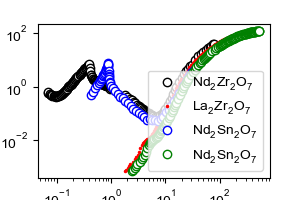

1.0333209425977692 1.4574429888202998


In [23]:
#%matplotlib inline
plt.close('all')
fig=plt.figure(figsize=(3,2))
ax = fig.add_subplot(111, xscale='log', yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
ax.plot(cpnd[:,0], cpnd[:,1]/2,'o', mfc='white',mec='black',label=r'Nd$_2$Zr$_2$O$_7$')
ax.plot(cpla[:,0], cpla[:,1]/2,'r.',markersize=3,label=r'La$_2$Zr$_2$O$_7$')
ax.plot(cpndsn[:,0], cpndsn[:,1]/2,'o',mfc='white',mec='blue',label=r'Nd$_2$Sn$_2$O$_7$')
ax.plot(cpla[:,0]*1.35, cpla[:,1]/2,'o',mfc='white',mec='g',label=r'Nd$_2$Sn$_2$O$_7$')
ax.set_xlabel('T (K)')
ax.set_ylabel('Cp (J/K/mold R)')
plt.legend()
plt.show()

m_nso, v_nso = 637.90, 10.56**3
m_lzo, v_lzo = 572.25, 10.79**3
scaleT = (m_nso/m_lzo)**0.5 * (v_nso/v_lzo)**0.333

Q112 = 2*np.pi/10.56*np.sqrt(1+1+4)
print(scaleT, Q112)

### Nd2Zr2O7

2.2239144598520872


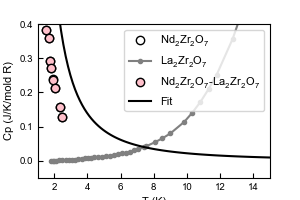

In [172]:

plt.close('all')

fig=plt.figure(figsize=(3,2))
# Plot Nd and La
ax = fig.add_subplot(111)#, xscale='log', yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
ax.plot(cpnd[:,0], cpnd[:,1]/2,'o', mfc='white',mec='black',label=r'Nd$_2$Zr$_2$O$_7$')
ax.plot(cpla[:,0], cpla[:,1]/2,'gray',marker='o', markersize=3,label=r'La$_2$Zr$_2$O$_7$')

# Plot Nd-La
cpnd_sub = cpnd.copy()
cpla_interp= interp1d(cpla[:,0],cpla[:,1])
mask = cpnd_sub[:,0]>1.9
cpnd_sub[mask,1] = cpnd_sub[mask,1] - cpla_interp(cpnd_sub[mask,0])

mask = cpnd_sub[:,0]<20
ax.plot(cpnd_sub[mask,0], cpnd_sub[mask,1]/2,'o', mfc='pink',mec='black',label=r'Nd$_2$Zr$_2$O$_7$-La$_2$Zr$_2$O$_7$')

# Plot a/T^2
jx, jy, jz = -0.091, 0.014, -0.046
a = 3*R/(16*kb**2) * (jx**2+jy**2+jz**2)
print(a)
t = np.linspace(1, 15, 100)
ax.plot(t, cp_ht_ph(t, a, 0, 0), 'black', lw=1.5, alpha=1, label='Fit')

ax.set_xlim(1,15)
ax.set_ylim(-0.05,0.4)
ax.set_xlabel('T (K)')
ax.set_ylabel('Cp (J/K/mold R)')
plt.legend()
plt.show()

### Nd2Sn2O7

#### Fit with T3 phonons
1. The fit is not so dependent on the fitting range

In [181]:
def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + a/t**2 * np.exp(-b/t)

fig_label = ('Data', r'Magnetic $\sim T^{-2}$', r'Lattice $\sim T^{3}$', 'Magnetic+lattice')
print(fig_label)

cpndsn = cpndsn_highT
cpndsn = cpndsn_hzb
#cpndsn[:,1] = cpndsn_hzb[:,1]/2

def pltFitReg(x1=3,x2=10, x3=0.3,x4=0.8):
    global fig, ax
    plt.cla()  
    ax.plot(cpndsn[:,0], cpndsn[:,1], 'o', mfc='white',label=fig_label[0])

    # Fit phonon with n0*T**3+n1*T**5 Note: the unit is per mole Nd
    popt, pcov = optimize.curve_fit(lambda t, a, n0, n1: cp_ht_ph(t,a,n0,n1), 
                                    fitReg(cpndsn,x1,x2)[:,0], fitReg(cpndsn,x1,x2)[:,1], 
                                    [5, 1.37681027e-04, 1.54163727e-07])
    print(popt)

    t = np.linspace(x1, x2, 100)
    ax.plot(t, cp_ht_ph(t, popt[0], popt[1], popt[2]), 'black', lw=1, alpha=1, label='Fit')
    ax.plot(t, cp_ht_ph(t, popt[0], 0, 0), 'r-', lw=0.5, alpha=1, label=fig_label[1])
    #ax.plot(t, cp_ht_ph(t, 2.4, 0, 0), 'green', lw=1, alpha=1, label='Theory')
    ax.plot(t, cp_ht_ph(t, 0, popt[1], popt[2]), 'r--', lw=0.5, alpha=1, label=fig_label[2])
    
    
    # Low T: T^-2 and gapped magnons
    #popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpndsn,x3,x4)[:,0], fitReg(cpndsn,x3,x4)[:,1], [0.008,4,0.7])
    #print(popt, pcov, '\n', 'The gap is: {:1.4f}+/-{:1.4f} meV'.format(popt[2]/11.6, pcov[2,2]/11.6) ) # Fitted gap = 0.25meV

    # plot the raw data
    #t = np.linspace(x3, x4, 100)
    #ax.plot(t, cpnmGap(t, popt[0], 0, 0), 'r-', lw=0.5, alpha=1, label='Nuclear')
    #ax.plot(t, cpnmGap(t, 0, popt[1], popt[2]), 'r--', lw=0.5, alpha=1, label='Magnetic')
    #ax.plot(t, cpnmGap(t, popt[0], popt[1], popt[2]), 'black', lw=1, alpha=1, label='Fit:mag.+nuc.')

   
    ax.set_xlim(0.1, 40)
    ax.set_ylim(0.001, 20)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_ylabel(r'Cp (J/K/mol Nd)',labelpad=-1)  
    ax.set_xlabel(r'T (K)',labelpad=-1)  
    ax.tick_params(axis='both',which='both',width=1,length=3)
    
    ax.legend(loc='best',numpoints=1,frameon=False,framealpha=1, fancybox=True,shadow=False)

    fig.savefig(os.path.join(r'D:\7_Writing\1_Paper Draft\11_Nd2Sn2O7/', r'Cp_fit_a.pdf'), bbox_inches="tight", pad_inches=0.01) 
    
    return fig

latexify()
fig, ax = plt.subplots()#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=1.,max=10,step=0.2,value=3),
                    x2=widgets.FloatSlider(min=5,max=20,step=0.5,value=20),
                    x3=widgets.FloatSlider(min=0.3,max=1.0,step=0.05,value=0.3),
                    x4=widgets.FloatSlider(min=0.5,max=1.0,step=0.05,value=0.8)
                    )#,__manual=True) 

('Data', 'Magnetic $\\sim T^{-2}$', 'Lattice $\\sim T^{3}$', 'Magnetic+lattice')


interactive(children=(FloatSlider(value=3.0, description='x1', max=10.0, min=1.0, step=0.2), FloatSlider(value…

<function __main__.pltFitReg(x1=3, x2=10, x3=0.3, x4=0.8)>

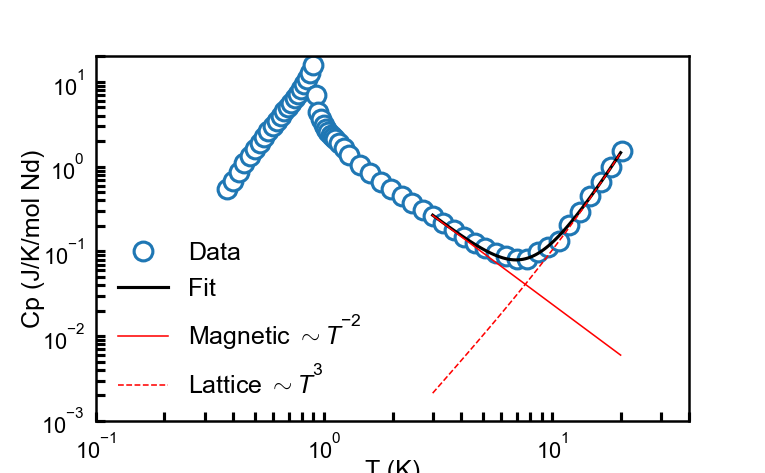

In [175]:
%matplotlib widget

#### Fit with subtracting La data 

In [116]:

fig_label = ('Data', r'Magnetic $\sim T^{-2}$', r'Lattice $\sim T^{3}$', 'Magnetic+lattice')
print(fig_label)

cpndsn = cpndsn_hzb
cplasn = cplasn_hzb

scale_La = 0.65
cpndsn_hzb_sub = cpndsn_hzb.copy()
cplasn_hzb_interp= interp1d(cplasn_hzb[:,0], cplasn_hzb[:,1])
mask = (0.3<cpndsn_hzb_sub[:,0]) & (cpndsn_hzb_sub[:,0]<19.5)

def pltFitReg(x1=5,x2=15, scale_La=0.75):
    global fig, ax
    plt.cla()
    ax.plot(cpndsn[:,0], cpndsn[:,1]/4, 'o', mfc='white', label=r'Nd$_2$Sn$_2$O$_7$')
    ax.plot(cplasn[:,0], scale_La*cplasn[:,1]/4,'r.',markersize=3, label=r'La$_2$Sn$_2$O$_7$') # 05*: LaSn data seems seems two times larger

    cpndsn_hzb_sub[mask,1] = cpndsn_hzb[mask,1]/4 - scale_La*cplasn_hzb_interp(cpndsn_hzb_sub[mask,0])/4 #0.5*
    ax.plot(cpndsn_hzb_sub[:,0], cpndsn_hzb_sub[:,1],'o', ms=1,mfc='white',mec='b',label='Nd-La')

    # Fit only mag because phonon is subtracted
    popt, pcov = optimize.curve_fit(lambda t, a: cp_ht_ph(t,a,0,0), 
                                    fitReg(cpndsn_hzb_sub,x1,x2)[:,0], fitReg(cpndsn_hzb_sub,x1,x2)[:,1], 
                                    [5.577])
    print(popt)    

    t = np.linspace(x1, x2, 100)
    ax.plot(t, cp_ht_ph(t, popt[0], 0, 0), 'r-', lw=0.5, alpha=1, label=fig_label[1])
    ax.plot(t, cp_ht_ph(t, 1.20, 0, 0), 'green', lw=1, alpha=1, label='Theory')
    
    # Low T: T^-2 and gapped magnons
    #ax.plot(cpndsn_Blote[:,0], cpndsn_Blote[:,1]/2, 'o', mfc='white',label=fig_label[0])
    
    ax.set_xlim(0.3, 40)
    ax.set_ylim(0.001, 40)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_ylabel(r'Cp (J/K/mol Nd)',labelpad=-1)  
    ax.set_xlabel(r'T (K)',labelpad=-1)  
    ax.tick_params(axis='both',which='both',width=1,length=3)
    
    ax.legend(loc='best',numpoints=1,frameon=False,framealpha=1, fancybox=True,shadow=False)

    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_hightT.pdf'), bbox_inches="tight", verbose=True) 
    
    return fig

fig, ax = plt.subplots()#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=1.,max=5,step=0.2,value=5),
                    x2=widgets.FloatSlider(min=5,max=10,step=0.2,value=8),
              scale_La=widgets.FloatSlider(min=0.5,max=1.0,step=0.05,value=0.7))#,__manual=True) 

('Data', 'Magnetic $\\sim T^{-2}$', 'Lattice $\\sim T^{3}$', 'Magnetic+lattice')


interactive(children=(FloatSlider(value=5.0, description='x1', max=5.0, min=1.0, step=0.2), FloatSlider(value=…

<function __main__.pltFitReg(x1=5, x2=15, scale_La=0.75)>

In [126]:
np.exp(-7/1)

0.0009118819655545162

In [114]:
# Estimate a for magnetic HT expansion per 2 mol Nd
jx, jy, jz = -0.023370, 0.137284, -0.0846891


jx, jz = 0.06792, -0.07730
gap = 0.182
jy = 3*abs(jz) - gap**2/(3*abs(jz) - jx)

#jx, jy, jz = -0.09, 0.0, -0.043
3*R/(16*kb**2) * (jx**2+jy**2+jz**2) /2 # divided by 2 for per mole Nd

1.205319629222953

# Debye-Einstein fit of LaZrO

In [ ]:
lafpath = 'D:\3_Physical Properties\Heat_Capacity'
lafname = '3 La2Zr2O7_ppms.txt'
lafpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
lafname = r'cp_lazro_2-400k.txt'
lacp = np.genfromtxt(os.path.join(lafpath,lafname), usecols=(0,1), skip_header=1)  
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(lacp[:,0],lacp[:,1])
plt.show

In [ ]:
(582.9278/572.2546)**0.5/(10.67/10.80)

In [ ]:
from scipy import integrate
R = 8.314 # in J/K/mol
kb = 1.38*10**-23 # in J/K
nmol = 6.022*10**23 # Av
hbar = 6.626e-34/(2*np.pi) #in J*s OR  4.135667662e-12/(2*np.pi) # in meV*s

def Debye(t,thetaD): # Debye model for 11 atoms in Nd2Zr2O7
    return 11* 9*R* (t/thetaD)**3 * integrate.quad(lambda x: x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0, thetaD/t)[0]
vDebye = np.vectorize(Debye, excluded=['thetaD'])

def Einstein(t,thetaE): # Einstein model t and e1 are in K for 11 atoms in Nd2Zr2O7
    return 11* 3*R* (thetaE/t)**2 * np.exp(thetaE/t) / (np.exp(thetaE/t) - 1)**2
vEinstein = np.vectorize(Einstein, excluded=['thetaE'])

def DebyeEin(t,ratio,thetaD,thetaE): #Debye+Einstein Model: t, thetaD,thetaE are in K for 11 atoms in Nd2Zr2O7
    return ratio*Debye(t,thetaD) + (1-ratio)*Einstein(t,thetaE)
#     return rario* 9*R* (t/thetaD)**3 * integrate.quad(lambda x: x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0, thetaD/t)[0]\
#          + (1-ratio)* 3*R* (thetaE/t)**2 * np.exp(thetaE/t) / (np.exp(thetaE/t) - 1)**2

vDebyeEin = np.vectorize(DebyeEin, excluded=['ratio','thetaD','thetaE'])

def DebyeEin0(t,ratio,ratio0, thetaD,thetaE,thetaE0): #Debye+Einstein Model: t, thetaD,thetaE are in K for 11 atoms in Nd2Zr2O7
    return ratio0* ( ratio*Debye(t,thetaD) + (1-ratio)*Einstein(t,thetaE) ) + (1-ratio0)*Einstein(t,thetaE)
vDebyeEin0 = np.vectorize(DebyeEin0, excluded=['ratio','ratio0','thetaD','thetaE','thetaE0'])

In [ ]:
# Ｆｉｔ　Ｄｅｂｙｅ＋Ｅｉｎ
x1,x2 = 50, 300 
popt, pcov = optimize.curve_fit(vDebyeEin, fitReg(lacp,x1,x2)[:,0],fitReg(lacp,x1,x2)[:,1], [0.5,700,200])
print popt

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(lacp[:,0],lacp[:,1],'o',c='black',mfc='white',label='Data')

fit = vDebyeEin(lacp[:,0],popt[0],popt[1],popt[2])
ax.plot(lacp[:,0],fit,c='r',label='Fit')

ax.plot(lacp[:,0], popt[0]*vDebye(lacp[:,0],popt[1]), c='b',label='Debye' )
ax.plot(lacp[:,0], (1-popt[0])*vEinstein(lacp[:,0],popt[2]),c='g',label='Einstein' )
ax.legend(loc='best')
plt.show()

In [ ]:
np.savetxt( os.path.join(lafpath,'cp_lazro_2-400k_fit_Degye+Eins.txt'),np.vstack([lacp[:,0],fit]).T, fmt='%1.3e' )

In [ ]:
# Ｆｉｔ　Ｄｅｂｙｅ＋Ｅｉｎ＋Ｅｉｎ
popt, pcov = optimize.curve_fit(vDebyeEin0, lacp[:,0],lacp[:,1], [0.7,0.1, 700,200,100])
print popt

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(lacp[:,0],lacp[:,1],'o',c='black',mfc='white',label='Data')

fit = vDebyeEin0(lacp[:,0],popt[0],popt[1],popt[2],popt[3],popt[4])
ax.plot(lacp[:,0],fit,c='r',label='Fit')

ax.plot(lacp[:,0], popt[1]*popt[0]     *vDebye(lacp[:,0],popt[2]), c='b',label='Debye' )
ax.plot(lacp[:,0], popt[1]*(1-popt[0]) *vEinstein(lacp[:,0],popt[3]),c='g',label='Einstein' )
ax.plot(lacp[:,0], (1-popt[1])         *vEinstein(lacp[:,0],popt[4]),c='y',label='Einstein0' )
ax.legend(loc='best')
plt.show()

# Gd2Hf2O7 Cp

In [6]:
import pandas as pd
from scipy import optimize
# Gd2Hf2O7 Cp data
path = r'D:\4_Physical_Properties\Gd2Hf2O7\Cp_202105_Ralf_HZB/'
cp0T = pd.read_excel(path+'Gd2Hf2O7_Cp_0T.xls', usecols=['System Temp (Kelvin)', 'Samp HC (J/mole-K)', 'Samp HC Err (J/mole-K)'])
cp0p5T = pd.read_excel(path+'Gd2Hf2O7_Cp_0p5T.xls', usecols=['System Temp (Kelvin)', 'Samp HC (J/mole-K)', 'Samp HC Err (J/mole-K)'])
cp1p0T = pd.read_excel(path+'Gd2Hf2O7_Cp_1T.xls', usecols=['System Temp (Kelvin)', 'Samp HC (J/mole-K)', 'Samp HC Err (J/mole-K)'])
cp2p0T = pd.read_excel(path+'Gd2Hf2O7_Cp_2T_new.xls', usecols=['System Temp (Kelvin)', 'Samp HC (J/mole-K)', 'Samp HC Err (J/mole-K)'])
cp5p0T = pd.read_excel(path+'Gd2Hf2O7_Cp_5T.xls', usecols=['System Temp (Kelvin)', 'Samp HC (J/mole-K)', 'Samp HC Err (J/mole-K)'])
# Reported data
reported_cp = np.genfromtxt(r'D:\4_Physical_Properties\Gd2Hf2O7/Cp_202105_Ralf_HZB/Cp_Gd2Hf2O7_digitizer_pupblished_fig.txt',delimiter=',')

# LaZrO
lazro_cp = np.genfromtxt(r'D:\4_Physical_Properties\Gd2Hf2O7\Cp_202105_Ralf_HZB\cp_lazro_2-400k.txt', skip_header=1)

def interp_la_cp(x, xp=lazro_cp[:,0], fp=lazro_cp[:,1]):
    if (np.min(xp)<x) & (x<np.max(fp)):
        return np.interp(x, xp, fp)
    else:
        return 0
interp_la_cp_v = np.vectorize(interp_la_cp, excluded=['xp', 'fp'])

c:\Users\jhxup\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


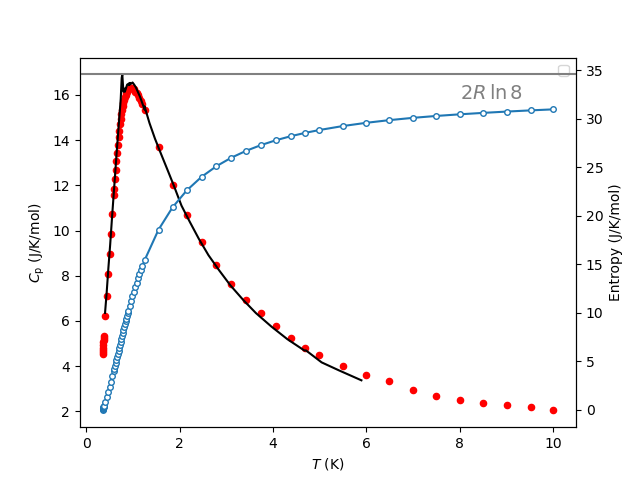

In [7]:
# Compare with reported 0 field data
R = 8.314 #in J/K/mol

fig, ax = plt.subplots()
cp0T.plot(x=0,y=1,yerr=cp0T['Samp HC Err (J/mole-K)'], ax=ax, kind='scatter',c='r')
ax.plot(reported_cp[:,0],2*reported_cp[:,1],c='black')

ts, cp_t, cp_t_err = cp0T.iloc[::-1,0], cp0T.iloc[::-1,1]/cp0T.iloc[::-1,0], cp0T.iloc[::-1,2]/cp0T.iloc[::-1,0]

entropy = cumtrapz(cp_t, ts, initial=0)#/R/np.log(8)
entropy_err = cumtrapz(cp_t_err, ts, initial=0)#/R/np.log(8)

ax1 = ax.twinx()
ax1.errorbar(ts, entropy, yerr=cp_t_err, marker='o', ms=4, mfc='white')
ax1.axhline(y=2*R*np.log(8), c='grey',ls='-')
ax1.text(8,32,'$2R\,\ln8$',fontsize='14',c='grey')
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax1.set_ylabel('Entropy (J/K/mol)')
ax.legend()
plt.show()

In [ ]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

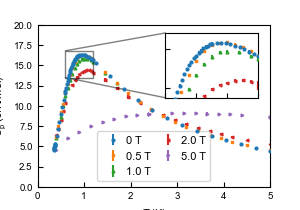

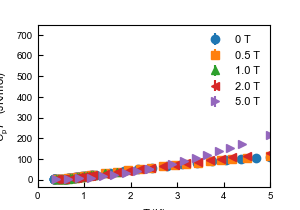

In [46]:
plt.close('all')
latexify(fig_width=3)
fig, ax = plt.subplots()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.errorbar(cp0T['System Temp (Kelvin)'],  cp0T['Samp HC (J/mole-K)']  - interp_la_cp_v(cp0T['System Temp (Kelvin)']),   yerr=cp0T['Samp HC Err (J/mole-K)'],  fmt='o', ms=2, label='0 T',zorder=5)
plt.errorbar(cp0p5T['System Temp (Kelvin)'],cp0p5T['Samp HC (J/mole-K)']- interp_la_cp_v(cp0p5T['System Temp (Kelvin)']), yerr=cp0p5T['Samp HC Err (J/mole-K)'],fmt='s', ms=2, label='0.5 T',zorder=4)
plt.errorbar(cp1p0T['System Temp (Kelvin)'],cp1p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp1p0T['System Temp (Kelvin)']), yerr=cp1p0T['Samp HC Err (J/mole-K)'],fmt='^', ms=2, label='1.0 T',zorder=3)
plt.errorbar(cp2p0T['System Temp (Kelvin)'],cp2p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp2p0T['System Temp (Kelvin)']), yerr=cp2p0T['Samp HC Err (J/mole-K)'],fmt='<', ms=2, label='2.0 T',zorder=2)
plt.errorbar(cp5p0T['System Temp (Kelvin)'],cp5p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp5p0T['System Temp (Kelvin)']), yerr=cp5p0T['Samp HC Err (J/mole-K)'],fmt='>', ms=2, label='5.0 T',zorder=1)

#ax.plot(lazro_cp[:,0],lazro_cp[:,1], label='La$_2$Zr$_2$O$_7$')
#ax.plot(reported_cp[:,0],2*reported_cp[:,1],c='k', label='Ref. ?',zorder=10)

ax.set_xlim([0,5])
ax.set_ylim([0,20])
handles, labels = ax.get_legend_handles_labels()

#leg_order = [2,3,4,5,6,0,1]
#leg_order = [2,3,4,5,0,1]
#plt.legend([handles[idx] for idx in leg_order],[labels[idx] for idx in leg_order],frameon=False)
plt.legend(ncols=2, loc='lower center', columnspacing=0.5, handletextpad=0.2)
#plt.yscale("log")

ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')

x1, x2, y1, y2 = 0.6, 1.2, 13.5, 16.8  # subregion of the original image
axins = ax.inset_axes(
    [0.55, 0.55, 0.4, 0.4],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

axins.errorbar(cp0T['System Temp (Kelvin)'],  cp0T['Samp HC (J/mole-K)']  - interp_la_cp_v(cp0T['System Temp (Kelvin)']),   yerr=cp0T['Samp HC Err (J/mole-K)'],  fmt='o', ms=2, label='0 T',zorder=5)
axins.errorbar(cp0p5T['System Temp (Kelvin)'],cp0p5T['Samp HC (J/mole-K)']- interp_la_cp_v(cp0p5T['System Temp (Kelvin)']), yerr=cp0p5T['Samp HC Err (J/mole-K)'],fmt='s', ms=2, label='0.5 T',zorder=4)
axins.errorbar(cp1p0T['System Temp (Kelvin)'],cp1p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp1p0T['System Temp (Kelvin)']), yerr=cp1p0T['Samp HC Err (J/mole-K)'],fmt='^', ms=2, label='1.0 T',zorder=3)
axins.errorbar(cp2p0T['System Temp (Kelvin)'],cp2p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp2p0T['System Temp (Kelvin)']), yerr=cp2p0T['Samp HC Err (J/mole-K)'],fmt='<', ms=2, label='2.0 T',zorder=2)
axins.errorbar(cp5p0T['System Temp (Kelvin)'],cp5p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp5p0T['System Temp (Kelvin)']), yerr=cp5p0T['Samp HC Err (J/mole-K)'],fmt='>', ms=2, label='5.0 T',zorder=1)
#axins.plot(reported_cp[:,0],2*reported_cp[:,1],c='k', label='Ref. ?',zorder=10)

ax.indicate_inset_zoom(axins, edgecolor="black")
#fig.savefig(r'D:\4_Physical_Properties\Gd2Hf2O7\Cp_202105_Ralf_HZB/cp.pdf', bbox_inches="tight", pad_inches=0.01)
plt.show()

# Plot Cp*T^2
fig, ax = plt.subplots()
plt.errorbar(cp0T['System Temp (Kelvin)'],  (cp0T['Samp HC (J/mole-K)']  - interp_la_cp_v(cp0T['System Temp (Kelvin)']))  *cp0T['System Temp (Kelvin)']**2,   yerr=cp0T['Samp HC Err (J/mole-K)'],  fmt='o', label='0 T')
plt.errorbar(cp0p5T['System Temp (Kelvin)'],(cp0p5T['Samp HC (J/mole-K)']- interp_la_cp_v(cp0p5T['System Temp (Kelvin)']))*cp0p5T['System Temp (Kelvin)']**2, yerr=cp0p5T['Samp HC Err (J/mole-K)'],fmt='s', label='0.5 T')
plt.errorbar(cp1p0T['System Temp (Kelvin)'],(cp1p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp1p0T['System Temp (Kelvin)']))*cp1p0T['System Temp (Kelvin)']**2, yerr=cp1p0T['Samp HC Err (J/mole-K)'],fmt='^', label='1.0 T')
plt.errorbar(cp2p0T['System Temp (Kelvin)'],(cp2p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp2p0T['System Temp (Kelvin)']))*cp2p0T['System Temp (Kelvin)']**2, yerr=cp2p0T['Samp HC Err (J/mole-K)'],fmt='<', label='2.0 T')
plt.errorbar(cp5p0T['System Temp (Kelvin)'],(cp5p0T['Samp HC (J/mole-K)']- interp_la_cp_v(cp5p0T['System Temp (Kelvin)']))*cp5p0T['System Temp (Kelvin)']**2, yerr=cp5p0T['Samp HC Err (J/mole-K)'],fmt='>', label='5.0 T')

ax.set_xlim([0,5])

plt.legend(frameon=False)

 
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}T^2$ (JK/mol)')
plt.show()

## Fit 0T data
* Single gap
* Gass distri. gap
* Gauss distri. gap with exponential $\Delta(T)$ and $\sigma(T)$

c:\Users\jhxup\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


[0.10879581] [[1.14117791e-05]]


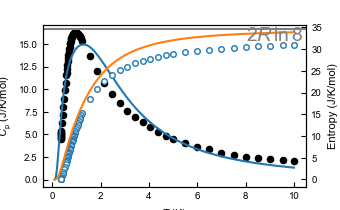

In [25]:
R = 8.314 # in J/K/mol
kb = 1.38*10**-23 # in J/K
nmol = 6.022*10**23 # Av
hbar = 6.626e-34/(2*np.pi) #in J*s OR  4.135667662e-12/(2*np.pi) # in meV*s
ubT = 0.6717 # in K
nleveles = 8
degeneracy = np.ones(nleveles) #degenercy 
levels = np.arange(nleveles*1.0)*11.6 # in K
sqrt2pi = np.sqrt(2*np.pi) 

@jit(float64(float64, float64))
def zeeman_cp(t, gap):
    """
    t: temperature in K
    gap: energy difference between two neibgoring levels in meV
    Return: Cp in J/K/2 mol ion
    """
    es = gap * levels
    pop = np.exp(-es/t)
    f0 = np.sum(pop) # assuming degenerary is 1 for all
    f1 = np.sum(es * pop)
    f2 = np.sum(es**2 * pop)
    return 2*nmol*kb/t**2 * (f0*f2 - f1**2) / f0**2
zeeman_cp_v = np.vectorize(zeeman_cp)    

# Check using two-level system: max~Nkb at 0.417gap: nlevels=2
# plt.figure()
# ts = np.linspace(0.1, 10, num=999)
# plt.plot(ts, zeeman_cp_v(ts,1/11.6))
# print(6.022*1.38)
# plt.show()

fig, ax = plt.subplots()
ax1 = ax.twinx()
cp0T.plot(x=0,y=1,ax=ax,kind='scatter',c='black')

x, y = cp0T.loc[0:,'System Temp (Kelvin)'].to_numpy(), cp0T.loc[0:,'Samp HC (J/mole-K)'].to_numpy()
mask = np.where(x<2)

entropy = cumtrapz((y/x), x, initial=0)#/R/np.log(8)
ax1.plot(x, entropy-entropy.min(),'o', ms=4, mfc='white')# due to deceading T

popt, pcov = optimize.curve_fit(zeeman_cp_v, x[mask], y[mask], [0.1])
print(popt, pcov)

ts = np.linspace(0.1, 10, num=999)
cp_fit = zeeman_cp_v(ts,popt[0])
ax.plot(ts, cp_fit)
entropy = cumtrapz(cp_fit/ts, ts, initial=0)#/R/np.log(8)

ax1.plot(ts, entropy,'-')
ax1.axhline(y=2*R*np.log(8), c='grey',ls='-')
ax1.text(8,32,'$2R\,\ln8$',fontsize='14',c='grey')

ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax1.set_ylabel('Entropy (J/K/mol)')

plt.show()

In [10]:
@jit(float64(float64, float64, float64, float64))
def integrand0(e, t, mu, sigma):
    return 1/(sqrt2pi*sigma) * np.exp(-(e-mu)**2/2/sigma**2)*zeeman_cp(t, e)
    #return 1./(1.+(e-mu)**2/sigma**2)*zeeman_cp(t, e)

@jit(float64(float64, float64, float64))
def integrand1(e, mu, sigma):
    return 1/(sqrt2pi*sigma) * np.exp(-(e-mu)**2/2/sigma**2)
    #return 1./(1.+(e-mu)**2/sigma**2)

def zeeman_cp_Gauss(t, mu, sigma):
    #es = np.linspace(0.001,5*sigma,num=100)
    #return np.sum([integrand0(e, t, mu, sigma) for e in es]) / np.sum([integrand1(e, mu, sigma) for e in es]) # why different from quad?
    if mu>0:
        if np.any(quad(lambda e: integrand1(e, mu, sigma), 0, np.inf)[0]==0):
            return 0.
        else:
            return quad(lambda e: integrand0(e, t, mu, sigma), 0, np.inf)[0] / quad(lambda e: integrand1(e, mu, sigma), 0, np.inf)[0]# upper limit 5*sigma no working
    else:
        if np.any(quad(lambda e: integrand1(e, mu, sigma), -np.inf,0)[0]==0):
            return 0.
        else:
            return quad(lambda e: integrand0(e, t, mu, sigma), -np.inf,0)[0] / quad(lambda e: integrand1(e, mu, sigma), -np.inf,0)[0]# upper limit 5*sigma no working

# Definite intigration of Gauss distri. is erf(b)-erf(a) https://math.stackexchange.com/questions/41608/definite-integral-of-normal-distribution
def zeeman_cp_Gauss(t, mu, sigma):
    from scipy.special import erf
    if mu < 0:
        mu = -mu
    sumProb = 0.5 * (1 - erf((0-mu)/(1.414*sigma)))
    sumCp = quad(lambda e: integrand0(e, t, mu, sigma), 0, np.inf)[0]
    
    return sumCp/sumProb
    
def zeeman_cp_Gauss_scale(t, mu0, sigma0, alpha, tc):
    scale = (1-t/tc)**alpha
    mu, sigma = mu0*scale, sigma0*scale
    return zeeman_cp_Gauss(t, mu, sigma)

zeeman_cp_Gauss_v = np.vectorize(zeeman_cp_Gauss)
zeeman_cp_Gauss_scale_v = np.vectorize(zeeman_cp_Gauss_scale)

def zeeman_cp_rect(t, w):
    if w<=0:
        ValueError('w not be larger than zero.')
    else:
        return quad(lambda e: zeeman_cp(t, e), 0, w)[0] / w

def zeeman_cp_rect_scale(t, w0, alpha, tc):
    w = w0*(1-t/tc)**alpha
    return zeeman_cp_rect(t, w)
    
zeeman_cp_rect_v = np.vectorize(zeeman_cp_rect)
zeeman_cp_rect_scale_v = np.vectorize(zeeman_cp_rect_scale)

print(zeeman_cp_Gauss(5,0.1,0.1))

zeeman_cp_rect(5,0.1)

5.852409582183372


1.4158938402146497

c:\Users\jhxup\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


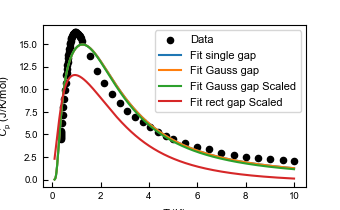

In [11]:
# Compare the three models for the single gap case
plt.close('all')
fig, ax = plt.subplots()
cp0T.plot(x=0,y=1,ax=ax,kind='scatter',c='black', label='Data')

x, y = cp0T.loc[:,'System Temp (Kelvin)'].to_numpy(), cp0T.loc[:,'Samp HC (J/mole-K)'].to_numpy()

ts = np.linspace(0.1, 10, num=999)
ax.plot(ts, zeeman_cp_v(ts,0.106), label='Fit single gap')

cp_fit = [zeeman_cp_Gauss(t, 0.106, 0.003) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap')

cp_fit = [zeeman_cp_Gauss_scale(t, 0.106,0.003,0.5,110) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap Scaled')

cp_fit = [zeeman_cp_rect_scale(t, 0.18, 0.5, 11) for t in ts]
ax.plot(ts, cp_fit, label='Fit rect gap Scaled')

ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax.legend()
plt.show()

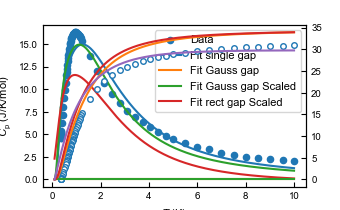

In [12]:
# Compare the three models for the single gap case
plt.close('all')
dat = cp0T

fig, ax = plt.subplots()
ax1 = ax.twinx()

dat.plot(x=0,y=1,ax=ax,kind='scatter',label='Data')

x, y = dat.loc[0:,'System Temp (Kelvin)'].to_numpy(), dat.loc[0:,'Samp HC (J/mole-K)'].to_numpy()
entropy = cumtrapz((y/x), x, initial=0)#/R/np.log(8)
ax1.plot(x, entropy-entropy.min(),'o', ms=4, mfc='white')# due to deceading T

ts = np.linspace(0.1, 10, num=999)
cp_fit = zeeman_cp_v(ts,0.106)
ax.plot(ts, cp_fit, label='Fit single gap')
entropy = cumtrapz(cp_fit/ts, ts, initial=0)#/R/np.log(8)
ax1.plot(ts, entropy,'-', ms=4, mfc='white')

cp_fit = [zeeman_cp_Gauss(t, 0.1, 0.0005) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap')
entropy = cumtrapz(cp_fit/ts, ts, initial=0)#/R/np.log(8)
ax1.plot(ts, entropy,'-', ms=4, mfc='white')

cp_fit = [zeeman_cp_Gauss_scale(t, 0.095,0.005,0.5,200) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap Scaled')
entropy = cumtrapz(cp_fit/ts, ts, initial=0)#/R/np.log(8)
ax1.plot(ts, entropy,'-', ms=4, mfc='white')

cp_fit = [zeeman_cp_rect_scale(t, 0.18,0.5,11) for t in ts]
ax.plot(ts, cp_fit, label='Fit rect gap Scaled')
entropy = cumtrapz(cp_fit/ts, ts, initial=0)#/R/np.log(8)
ax1.plot(ts, entropy,'-', ms=4, mfc='white')

ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax.legend()
plt.show()

[0.10661545 0.00133468]
[1.15215743e-01 1.13703423e-03 5.62060535e-01 1.07529442e+01]
[ 0.19557093  0.1        99.99998639]


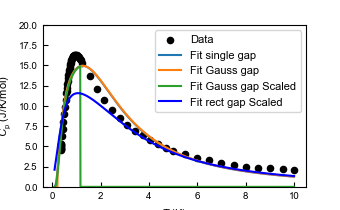

In [27]:
# Comapare the three fitted models
plt.close('all')
fig, ax = plt.subplots()
cp0T.plot(x=0,y=1,ax=ax,kind='scatter',c='black', label='Data')

x, y = cp0T.loc[:,'System Temp (Kelvin)'].to_numpy(), cp0T.loc[:,'Samp HC (J/mole-K)'].to_numpy()
mask = np.where(x<100)

ts = np.linspace(0.1, 10, num=999)
ax.plot(ts, zeeman_cp_v(ts,0.106), label='Fit single gap')

popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_v, x[mask], y[mask], p0=[0.05,0.01], bounds=[(0.05,0.0001),(1.0,0.5)])
print(popt)
cp_fit = [zeeman_cp_Gauss(t, popt[0], popt[1]) for t in ts]
#cp_fit = [zeeman_cp_Gauss(t, 0.106, 0.01) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap')

#popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_scale_v, x[mask], y[mask], p0=[0.05,0.01,0.5,11], bounds=[(0.001,0.001,0.1,10), (1.0,1.0,0.9,11.1)])
popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_scale_v, x[mask], y[mask], p0=[0.05,0.0011,0.5,11], bounds=[(0.001,0.001,0.1,10), (1.0,0.0012,0.9,11.1)])

print(popt)
cp_fit = [zeeman_cp_Gauss_scale(t, popt[0], popt[1], popt[2],popt[3]) for t in ts]
#cp_fit = [zeeman_cp_Gauss_scale(t, 0.1,0.02,0.5,11) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap Scaled')

popt, pcov = optimize.curve_fit(zeeman_cp_rect_scale_v, x[mask], y[mask], p0=[0.1,0.5,11], bounds=[(0.05,0.1,10),(50, 0.9,100)])
print(popt)
cp_fit = [zeeman_cp_rect_scale(t, popt[0], popt[1], popt[2]) for t in ts]
ax.plot(ts, cp_fit, c='b',label='Fit rect gap Scaled')

ax.set_ylim([0,20])
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax.legend()
plt.show()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 35.11756587023258
        x: [ 1.129e-01  4.621e-02]
      nit: 7
      jac: [ 7.148e-04  2.098e-03]
     nfev: 27
     njev: 9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


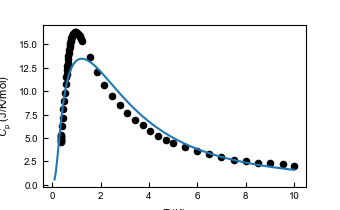

In [30]:
# Use minimize for gauss distri.
def minTarget(mu_sigma):
    return np.sum((zeeman_cp_Gauss_v(x, mu_sigma[0],mu_sigma[1])-y)**2)
    
res = optimize.minimize(minTarget, (0.1,0.03), bounds=[(0.02,0.3), (0.00001,0.1)])

plt.close('all')
fig, ax = plt.subplots()
cp0T.plot(x=0,y=1,ax=ax,kind='scatter',c='black')

ts = np.linspace(0.1, 10, num=999)
cp_fit = [zeeman_cp_Gauss(t, res.x[0], res.x[1]) for t in ts]
ax.plot(ts, cp_fit)

ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
print(res)
plt.show()

## 2T data

[0.11103846]
[0.11291998 0.04620934]


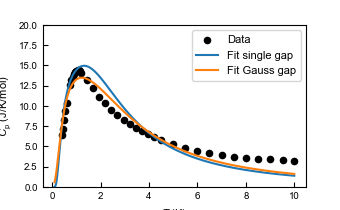

In [29]:
# Comapare the three fitted models
dat = cp2p0T

plt.close('all')

fig, ax = plt.subplots()
dat.plot(x=0,y=1,ax=ax,kind='scatter',c='black', label='Data')

x, y = dat.loc[:,'System Temp (Kelvin)'].to_numpy(),dat.loc[:,'Samp HC (J/mole-K)'].to_numpy()

popt, pcov = optimize.curve_fit(zeeman_cp_v, x,y, [5*ubT/11.6])
print(popt)
ts = np.linspace(0.1, 10, num=999)
ax.plot(ts, zeeman_cp_v(ts,popt[0]), label='Fit single gap')

popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_v, x[0:], y[0:], p0=[0.06,0.1], bounds=[(0.05,0.0001),(1.0,0.5)])
print(popt)
cp_fit = [zeeman_cp_Gauss(t, popt[0], popt[1]) for t in ts]
ax.plot(ts, cp_fit, label='Fit Gauss gap')

ax.set_ylim([0,20])
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax.legend()
plt.show()

## 5T data

[0.20825734]
[0.05       0.33598553]


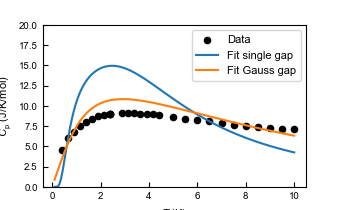

In [28]:
# Comapare the three fitted models
plt.close('all')
fig, ax = plt.subplots()

dat = cp5p0T

dat.plot(x=0,y=1,ax=ax,kind='scatter',c='black', label='Data')

x, y = dat.loc[:,'System Temp (Kelvin)'].to_numpy(),dat.loc[:,'Samp HC (J/mole-K)'].to_numpy()

popt, pcov = optimize.curve_fit(zeeman_cp_v, x,y, [5*ubT/11.6])
print(popt)
ts = np.linspace(0.1, 10, num=999)
ax.plot(ts, zeeman_cp_v(ts,popt[0]), label='Fit single gap')

popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_v, x[0:], y[0:], p0=[0.06,0.1], bounds=[(0.05,0.0001),(1.0,0.5)])
print(popt)
cp_fit_5T = [zeeman_cp_Gauss(t, popt[0], popt[1]) for t in ts]
ax.plot(ts, cp_fit_5T, label='Fit Gauss gap')

ax.set_ylim([0,20])
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax.legend()
plt.show()

In [ ]:
# Calculate gap from external field, J and Dip
zeeman = 5*ubT/11.6
exchage = -0.184/(3.5*(3.5+1))*3.5*6
dip = 0.066/(3.5*(3.5+1))*3.5*6 *0# powder average factor: 0
print(zeeman, exchage, zeeman + exchage)

## Reproduce the fit for Gd2Mo2O7 and Gd2Ti2O7
N. P. Raju et al, Physical Review B 46, 5405 (1992).
of which Table III is in K
* Gd2Mo2O7: fitted $\Delta$ and $\sigma$ are an order of magnitude lower
  
N. P. Raju et al, Physical Review B 59, 14489 (1999).
* Gd2Ti2O7: fitted $T>1.5$K instead of $T>1$K; no parameters reported in that paper

[ 0.91383702  0.62503556  0.499      50.1       ]
$Delta_0, \sigma_0 in K$: 10.60050948965851 7.250412468637765
[ 1.97523546  0.499      50.1       ]
$\sigma_R in K$: 22.912731390606137


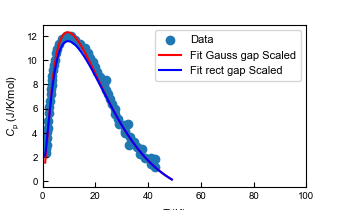

Consistent!


In [18]:
gdmoo_cp = np.genfromtxt(r'D:\4_Physical_Properties\Gd2Hf2O7\Cp_202105_Ralf_HZB/Gd2Mo2O7_Cp_1992.txt',delimiter=',')
x, y = gdmoo_cp[:,0], gdmoo_cp[:,1]

plt.close('all')
fig, ax = plt.subplots()
ax.scatter(x,y,label='Data')

ts = np.linspace(1, 49, num=999)
popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_scale_v, x, y, p0=[1.1,0.8,0.5,50], bounds=[(0.05,0.0001,0.499,49.9),(50,50,0.501,50.1)])
print(popt)
print(r'$Delta_0, \sigma_0 in K$:', popt[0]*11.6, popt[1]*11.6)
cp_fit = [zeeman_cp_Gauss_scale(t, popt[0], popt[1], popt[2],popt[3]) for t in ts]
ax.plot(ts, cp_fit, c='r',label='Fit Gauss gap Scaled')

popt, pcov = optimize.curve_fit(zeeman_cp_rect_scale_v, x, y, p0=[1.0,0.5,50], bounds=[(0.05,0.499,49.9),(50, 0.501,50.1)])
print(popt)
print(r'$\sigma_R in K$:', popt[0]*11.6)
cp_fit = [zeeman_cp_rect_scale(t, popt[0], popt[1], popt[2]) for t in ts]
ax.plot(ts, cp_fit, c='b',label='Fit rect gap Scaled')

ax.set_xlim(0,100)
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax.legend()
plt.show()
print('Consistent!')

[8.66083558e-02 9.64049713e-02 1.80121609e-11 6.10000000e+01]


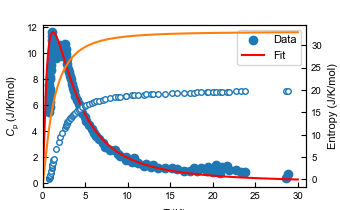

In [19]:
# Gd2Ti2O7 data (prb1999)
gdmoo_cp = np.genfromtxt(r'D:\4_Physical_Properties\Gd2Hf2O7\Cp_202105_Ralf_HZB/Gd2Ti2O7_Cp_prb1999.txt',delimiter=',')
mask = gdmoo_cp[:,0]>1.5 # but in the paper above 1K is fitted
x, y = gdmoo_cp[mask,0], gdmoo_cp[mask,1]

plt.close('all')
fig, ax = plt.subplots()
ax1 = ax.twinx()

entropy = cumtrapz(gdmoo_cp[:,1]/gdmoo_cp[:,0], gdmoo_cp[:,0], initial=0) #/R/np.log(8)
ax.scatter(gdmoo_cp[:,0], gdmoo_cp[:,1],label='Data')
ax1.plot(gdmoo_cp[:,0], entropy,'o', ms=4, mfc='white')# due to deceading T

popt, pcov = optimize.curve_fit(zeeman_cp_Gauss_scale_v, x, y, p0=[1.1,0.8,0.5,50], bounds=[(0.05,0.0001,0.,30),(50,50,1.0,61)])
print(popt)

ts = np.linspace(0.1, 30, num=999)
cp_fit = [zeeman_cp_Gauss_scale(t, popt[0], popt[1], popt[2],popt[3]) for t in ts]
entropy = cumtrapz(cp_fit/ts, ts, initial=0)#/R/np.log(8)

ax.plot(ts, cp_fit, c='r',label='Fit')
ax1.plot(ts, entropy,'-', ms=4, mfc='white')

ax.set_xlim(0,31)
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$C_\mathrm{p}$ (J/K/mol)')
ax1.set_ylabel('Entropy (J/K/mol)')
ax.legend()
plt.show()

In [20]:
np.array([0.77,0.89])*11.6

array([ 8.932, 10.324])